# 1) Preparação do Ambiente


## 1.1) Importação das Bibliotecas

In [1]:
# coding=utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
!python --version
!pip list


Python 3.10.12
Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.0
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.1
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                    

## 1.2) Carga da Base (Arquivo Excel)

Base contém os dados conjuntos de Arrecadação, PIB e Inadimplência.

Carga do arquivo base_consolidada.xlsx para DataFrame base.

In [3]:
arq_base = files.upload()
colunas = 'B:N'

base = pd.read_excel(arq_base['base_consolidada.xlsx'], usecols=colunas)

Saving base_consolidada.xlsx to base_consolidada.xlsx


## 1.3) Estatística Descritiva dos Dados

*   Campos;
*   Tipos dos campos;
*   Atributos categóricos;
*   Descrição dos dados;

In [4]:
print('*' * 73)
print('Campos da Base Consolidada com dados de Inadimplência, Arrecadação e PIB:')
print('*' * 73)
print('-' * 31)
print('Colunas          Tipo dos dados')
print('-' * 31)
print(base.dtypes)
print('-' * 37)
print('Atributos Categóricos:')
print('-' * 37)
atributos_categoricos = base.dtypes[base.dtypes == 'object'].index
print(base[atributos_categoricos].describe(), sep='\n')
print('*' * 172)
print('Descrição dos dados:')
print('-' * 172)
print(base.describe())
print('-' * 172)

*************************************************************************
Campos da Base Consolidada com dados de Inadimplência, Arrecadação e PIB:
*************************************************************************
-------------------------------
Colunas          Tipo dos dados
-------------------------------
Estado            object
Sigla             object
Municipio         object
arrec_2020       float64
inad_2020        float64
Valor_ab_agro    float64
Valor_ab_indu    float64
Valor_ab_serv    float64
Valor_ab_publ    float64
Valor_abt        float64
Impostos         float64
PIB              float64
PIB_pc           float64
dtype: object
-------------------------------------
Atributos Categóricos:
-------------------------------------
              Estado Sigla  Municipio
count           5570  5570       5570
unique            27    27       5289
top     MINAS GERAIS    MG  BOM JESUS
freq             853   853          5
******************************************************

# -----------------------------------------------------------------------------------------------------------

# 2) Ajuste e Transformação da Base

## 2.1) Eliminação dos Municípios com Inadimplência maior que 0,99.

Após análise dos dados e da realidade dos demais 5567 municípios, por definição, não se pode ter MEIs não pagantes no ano maior do que o seu total, ou seja, inadimplência maior do que 1 não é possível.

Serão mantidos todos apresentam inadimplência abaixo de 0,99.

Uma possível assunção seria a troca dos dados nas colunas DAS Pagos e Optantes do Simples - MEI.

In [5]:
print('*' * 71)
print('Municípios com Inadimplência maior que 0,99:')
print('-' * 71)
outliers_inad = pd.DataFrame
outliers_inad = base.loc[(base['inad_2020'] >= 1)]
print(outliers_inad.iloc[:, 0:5])
for indice in (base.loc[(base['inad_2020'] >= 1)]).index:
    base.drop(indice, inplace=True)
base.reset_index(drop=True, inplace=True)
print('*' * 71)
print('-' * 87)
print('Descrição dos dados, após eliminação 3 dos Municípios com Inadimplência maior que 0,99:')
print('-' * 172)
print(base.describe())
print('-' * 172)
print('Registros: ', base.shape[0], 'Colunas: ', base.shape[1])
print('*' * 29)

***********************************************************************
Municípios com Inadimplência maior que 0,99:
-----------------------------------------------------------------------
                 Estado Sigla          Municipio  arrec_2020  inad_2020
2997              PIAUÍ    PI   BETANIA DE PIAUI   27,944.06       1.04
3956  RIO GRANDE DO SUL    RS  BARRA DE RIO AZUL   34,077.77       1.02
4064  RIO GRANDE DO SUL    RS  ENTRE RIOS DE SUL   50,878.65       1.98
***********************************************************************
---------------------------------------------------------------------------------------
Descrição dos dados, após eliminação 3 dos Municípios com Inadimplência maior que 0,99:
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
          arrec_2020  inad_2020    Valor_ab_agro     Valor_ab_indu      Valor_ab_serv      Valor_ab_pu

In [6]:

print(base.iloc[[4061,1925,1252,3019,5130]])


                 Estado Sigla                  Municipio   arrec_2020  inad_2020  Valor_ab_agro    Valor_ab_indu    Valor_ab_serv  Valor_ab_publ        Valor_abt       Impostos              PIB    PIB_pc
4061  RIO GRANDE DO SUL    RS                ENTRE IJUIS   155,650.18       0.20  68,176,253.00    15,086,594.00   175,210,033.00  53,705,344.00   312,178,224.00  35,206,416.00   347,384,641.00 41,301.23
1925       MINAS GERAIS    MG                   PERDIGAO   302,558.11       0.18  13,364,670.00    60,325,512.00    70,494,309.00  54,150,501.00   198,334,991.00  16,767,616.00   215,102,608.00 18,298.82
1252           MARANHÃO    MA               NOVA COLINAS    17,281.83       0.79  32,865,471.00     2,040,168.00    12,168,989.00  24,592,148.00    71,666,775.00   2,002,914.00    73,669,689.00 13,574.66
3019              PIAUÍ    PI  CAPITAO GERVASIO OLIVEIRA    15,690.29       0.94   3,853,475.00     1,263,491.00     7,932,830.00  23,495,857.00    36,545,653.00   2,476,207.00    39,0

## 2.2) One-Hot-Enconding para a Sigla dos Estados
Utilidade da diferenciação regional nas análises.

In [7]:
siglas = pd.get_dummies(base.Sigla, prefix='Est')
base_processamento = pd.DataFrame()
base_processamento = pd.concat([base,siglas],axis=1)
base_processamento.drop(columns=['Sigla', 'Estado', 'Municipio'], inplace=True)
print('*' * 62)
print('Colunas da base_processamento - aplicação do One_Hot_Enconding')
print('-' * 62)
print(base_processamento.dtypes)
print('*' * 62)

**************************************************************
Colunas da base_processamento - aplicação do One_Hot_Enconding
--------------------------------------------------------------
arrec_2020       float64
inad_2020        float64
Valor_ab_agro    float64
Valor_ab_indu    float64
Valor_ab_serv    float64
Valor_ab_publ    float64
Valor_abt        float64
Impostos         float64
PIB              float64
PIB_pc           float64
Est_AC             uint8
Est_AL             uint8
Est_AM             uint8
Est_AP             uint8
Est_BA             uint8
Est_CE             uint8
Est_DF             uint8
Est_ES             uint8
Est_GO             uint8
Est_MA             uint8
Est_MG             uint8
Est_MS             uint8
Est_MT             uint8
Est_PA             uint8
Est_PB             uint8
Est_PE             uint8
Est_PI             uint8
Est_PR             uint8
Est_RJ             uint8
Est_RN             uint8
Est_RO             uint8
Est_RR             uint8
Est_RS     

In [8]:
print('*' * 174)
print('Base Consolidada Original:')
print('-' * 174)
print(base)
print('*' * 357)
print('Base após processamento de one-hot-enconding para os Estados:')
print('-' * 61)
print(base_processamento)

******************************************************************************************************************************************************************************
Base Consolidada Original:
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         Estado Sigla       Municipio  arrec_2020  inad_2020  Valor_ab_agro  Valor_ab_indu  Valor_ab_serv  Valor_ab_publ      Valor_abt      Impostos            PIB    PIB_pc
0          ACRE    AC      ACRELANDIA   63,634.98       0.37  76,452,625.00  16,073,162.00  81,972,069.00 106,340,012.00 280,837,868.00 21,606,705.00 302,444,572.00 19,525.15
1          ACRE    AC    ASSIS BRASIL   42,930.09       0.44  16,231,206.00   3,294,399.00  16,343,800.00  58,518,530.00  94,387,935.00  2,532,391.00  96,920,325.00 12,864.39
2          ACRE    AC       BRASILEIA  167,386.12       0.36  68,646,625.00  38,459,028.00 141,099

## 2.3) Transformando as variáveis float64 para base log10

In [9]:
colunas_float = base_processamento.dtypes[base_processamento.dtypes == 'float64'].index
colunas_float = colunas_float.drop(['inad_2020'])

base_process_log10 = pd.DataFrame
base_process_log10 = base_processamento.copy()

for coluna in colunas_float:
    base_process_log10[coluna] = base_process_log10[coluna].apply(lambda x: np.log10(abs(x)) if x!= 0 else -10).astype(float)

print('*' * 370)
print('Base após Transformação para base em log10 da variáveis float64:')
print('-' * 64)
print(base_process_log10.describe())
print('*' * 370)

**********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Base após Transformação para base em log10 da variáveis float64:
----------------------------------------------------------------
       arrec_2020  inad_2020  Valor_ab_agro  Valor_ab_indu  Valor_ab_serv  Valor_ab_publ  Valor_abt  Impostos      PIB   PIB_pc   Est_AC   Est_AL   Est_AM   Est_AP   Est_BA   Est_CE   Est_DF   Est_ES   Est_GO   Est_MA   Est_MG   Est_MS   Est_MT   Est_PA   Est_PB   Est_PE   Est_PI   Est_PR   Est_RJ   Est_RN   Est_RO   Est_RR   Est_RS   Est_SC   Est_SE   Est_SP   Est_TO
count    5,567.00   5,567.00       5,567.00       5,567.00       5,567.00       5,567.00   5,567.00  5,567.00 5,567.00 5,567.00 

# -----------------------------------------------------------------------------------------------------------

# 3) Análise dos Dados

## 3.1) Estatísticas descritivas da base_process_log10

In [10]:
print('*' * 78)
print('Campos da Base de Processamento com dados de Inadimplência, Arrecadação e PIB:')
print('*' * 78)
print('-' * 31)
print('Colunas          Tipo dos dados')
print('-' * 31)
print(base_process_log10.dtypes)
print('*' * 31)

******************************************************************************
Campos da Base de Processamento com dados de Inadimplência, Arrecadação e PIB:
******************************************************************************
-------------------------------
Colunas          Tipo dos dados
-------------------------------
arrec_2020       float64
inad_2020        float64
Valor_ab_agro    float64
Valor_ab_indu    float64
Valor_ab_serv    float64
Valor_ab_publ    float64
Valor_abt        float64
Impostos         float64
PIB              float64
PIB_pc           float64
Est_AC             uint8
Est_AL             uint8
Est_AM             uint8
Est_AP             uint8
Est_BA             uint8
Est_CE             uint8
Est_DF             uint8
Est_ES             uint8
Est_GO             uint8
Est_MA             uint8
Est_MG             uint8
Est_MS             uint8
Est_MT             uint8
Est_PA             uint8
Est_PB             uint8
Est_PE             uint8
Est_PI           

In [11]:
print('*' * 415)
print('Base origem antes da transformação:')
print('-' * 35)
print(base_processamento.describe())
print('*' * 415)
print('Base após Transformação para base em log10 da variáveis float64:')
print('-' * 64)
print(base_process_log10.describe())
print('*' * 370)

*******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Base origem antes da transformação:
-----------------------------------
          arrec_2020  inad_2020    Valor_ab_agro     Valor_ab_indu      Valor_ab_serv      Valor_ab_publ          Valor_abt           Impostos                PIB     PIB_pc   Est_AC   Est_AL   Est_AM   Est_AP   Est_BA   Est_CE   Est_DF   Est_ES   Est_GO   Est_MA   Est_MG   Est_MS   Est_MT   Est_PA   Est_PB   Est_PE   Est_PI   Est_PR   Est_RJ   Est_RN   Est_RO   Est_RR   Est_RS   Est_SC   Est_SE   Est_SP   Est_TO
count       5,567.00   5,567.00         5,567.00          5,567.00           5,567.00           

## 3.2) Histogramas das colunas dos dados originais

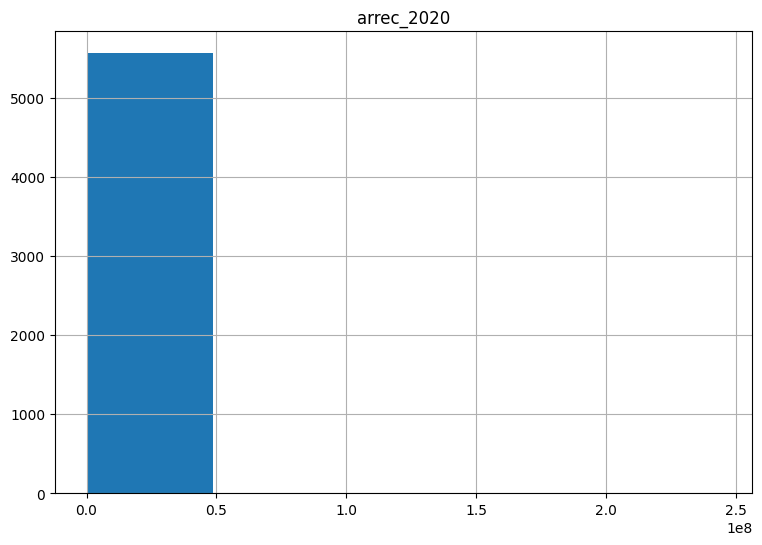

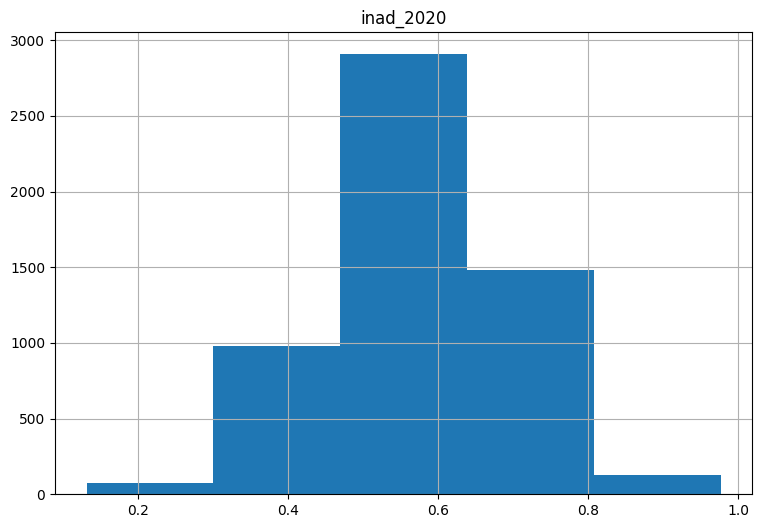

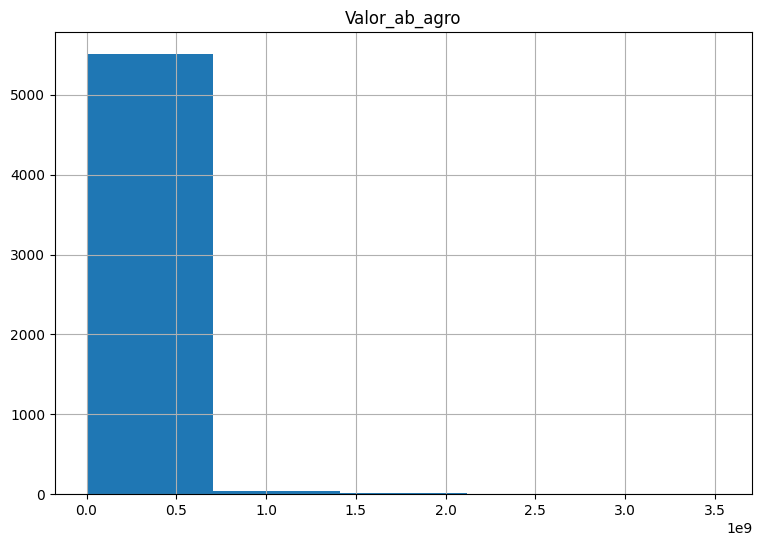

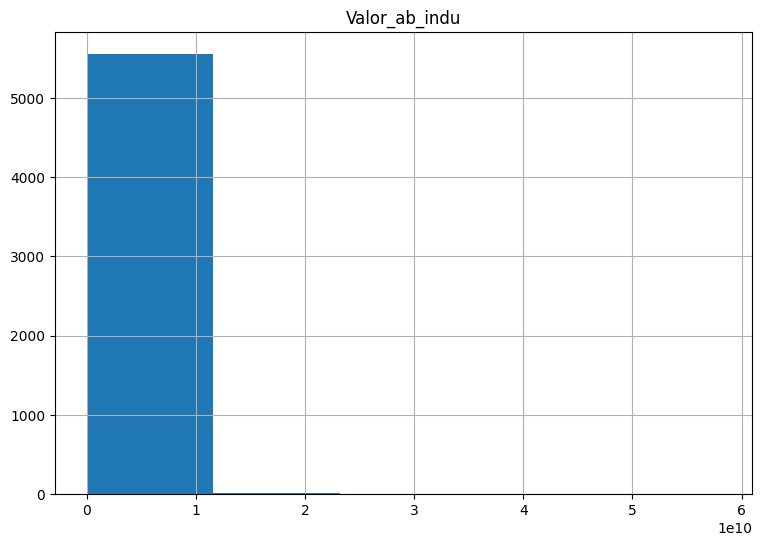

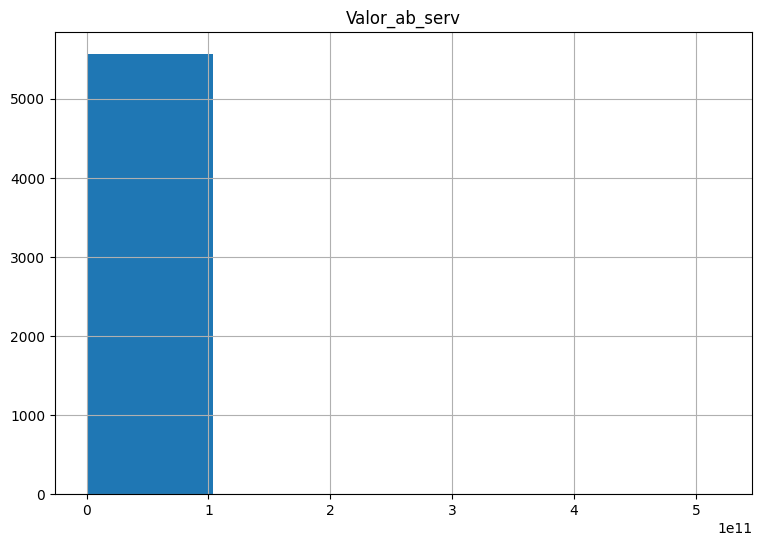

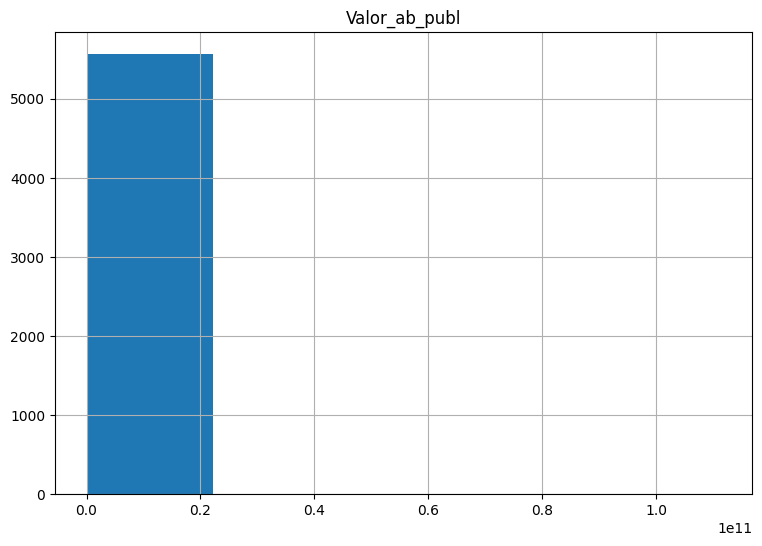

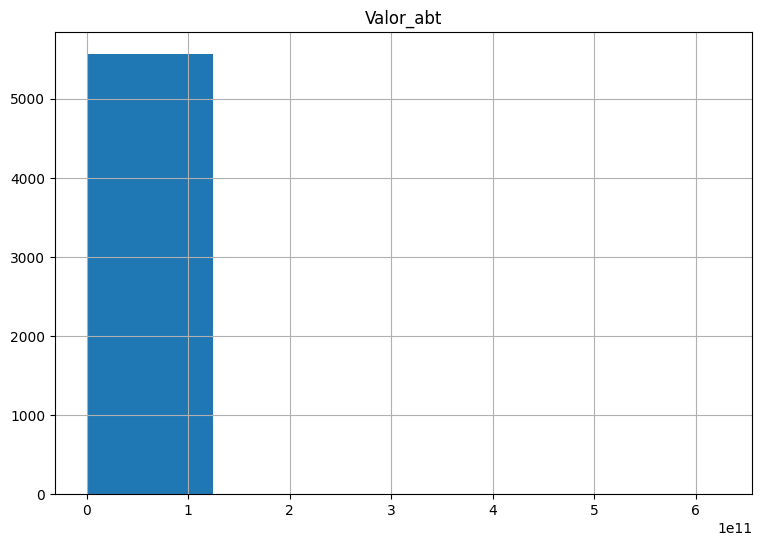

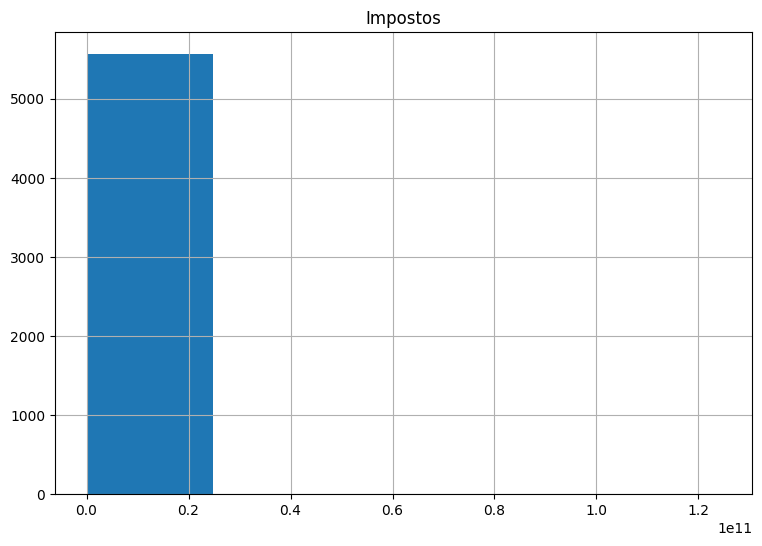

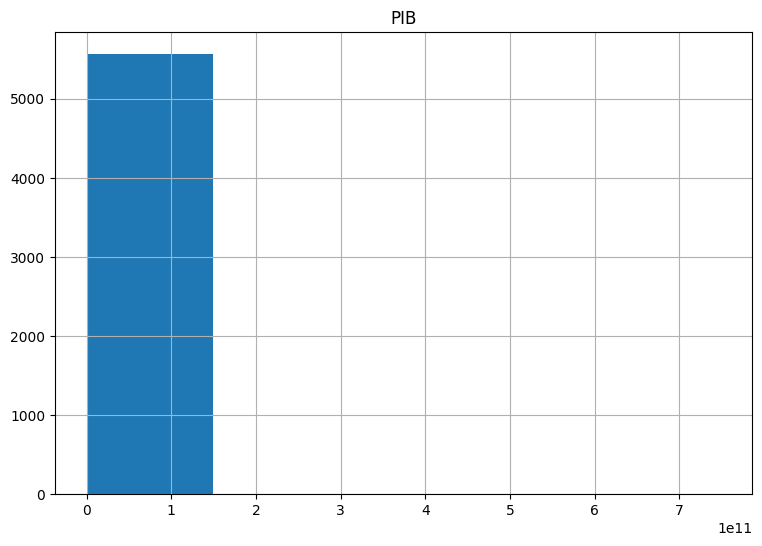

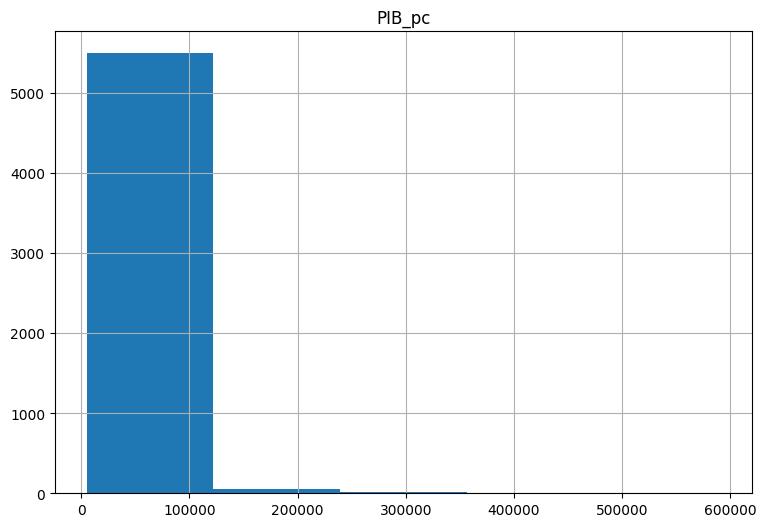

In [12]:
def plota_histogramas (dados):
    colunas = list(dados.keys())
    atrib_categ = list(dados.dtypes[dados.dtypes != 'float64'].index)
    for coluna in colunas:
        if not coluna in atrib_categ:
            dados.hist(column=coluna, figsize=(9,6), bins=5)


plota_histogramas(base_processamento)

## 3.3) Histogramas das colunas dos dados após transformação para escala logaritmica base 10

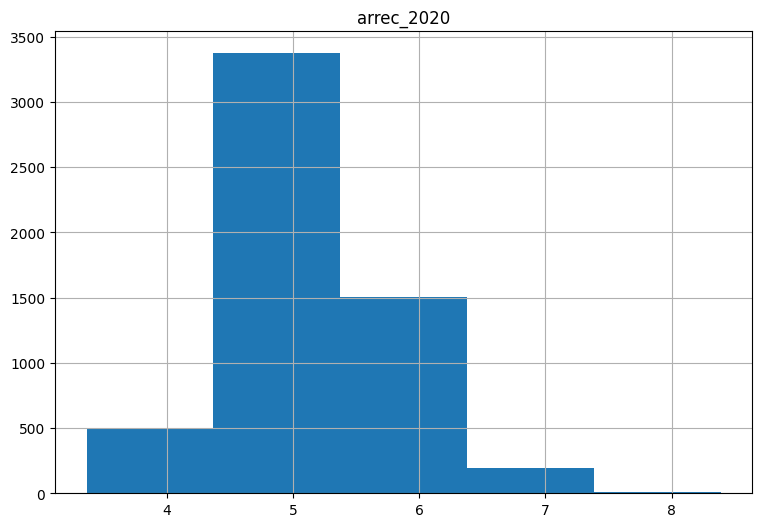

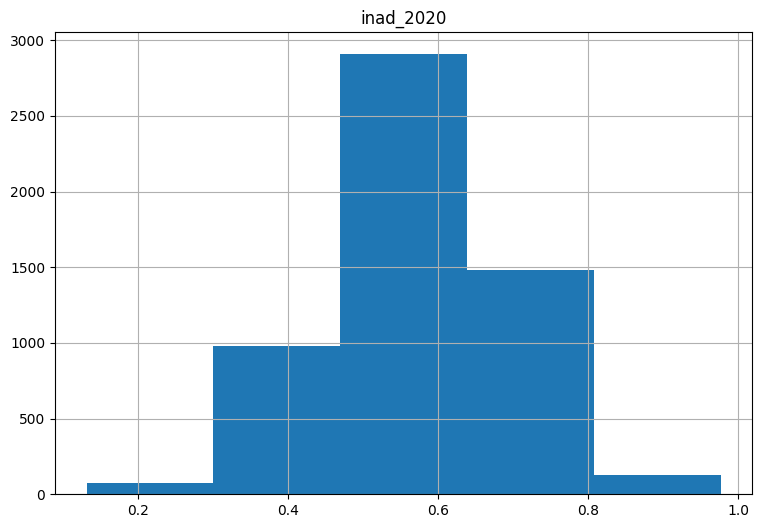

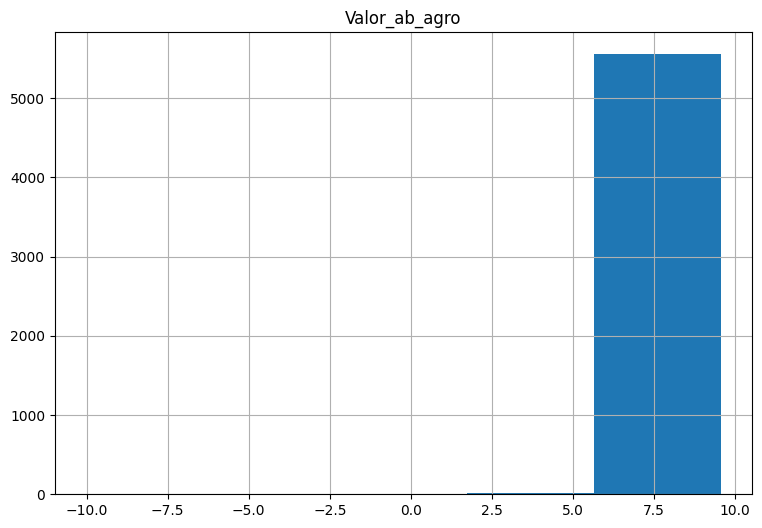

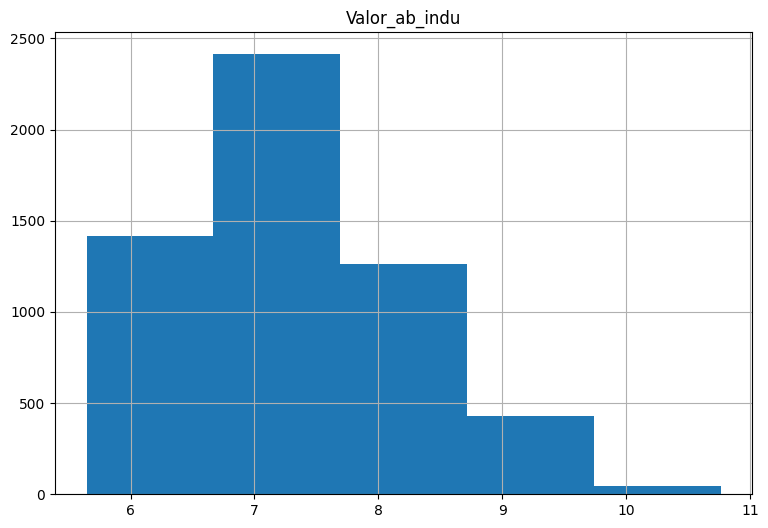

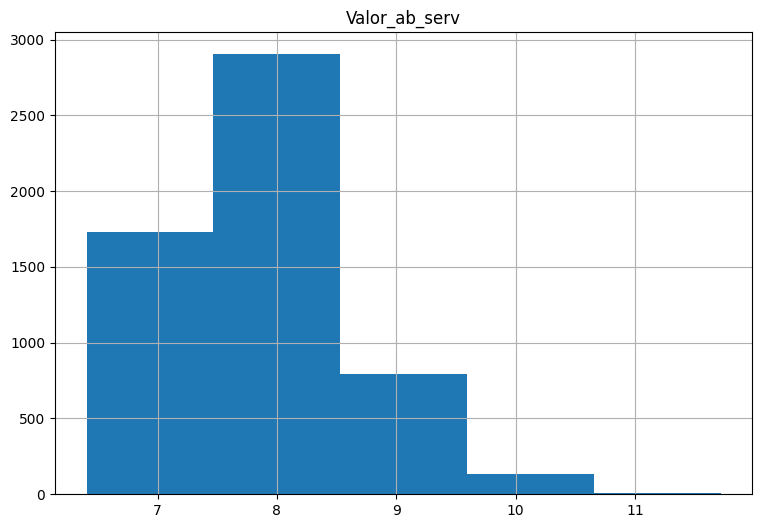

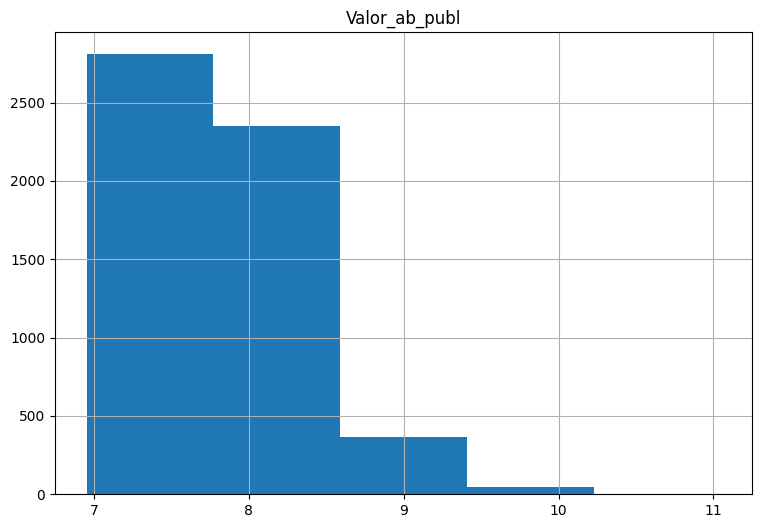

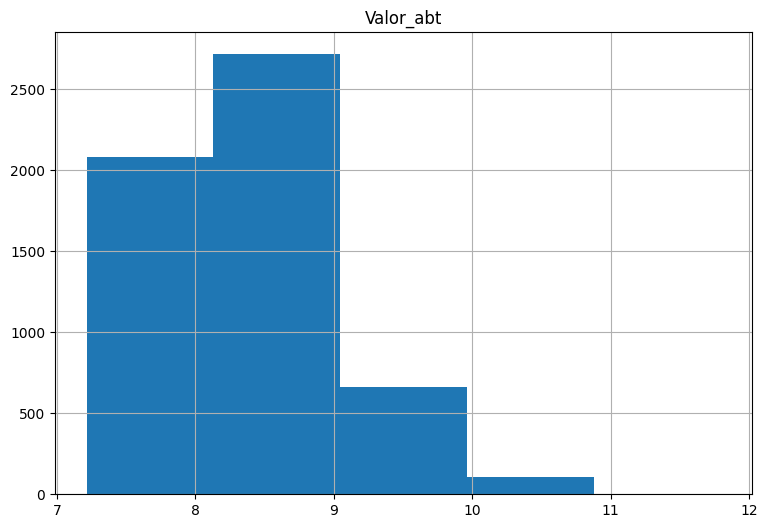

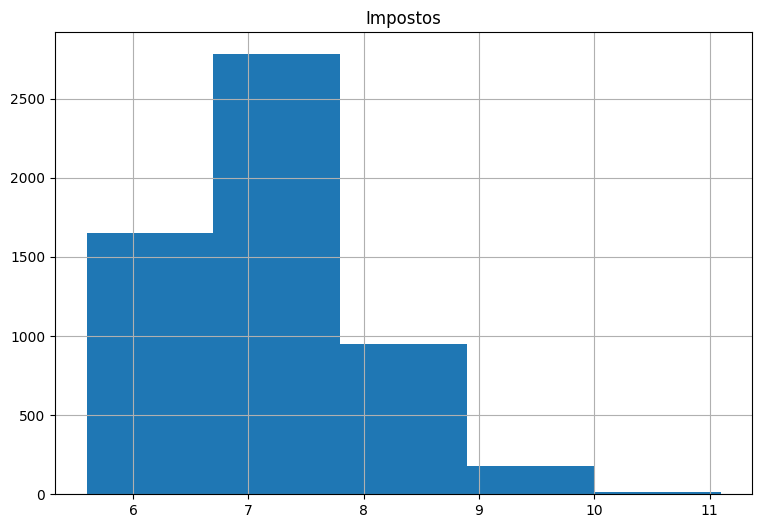

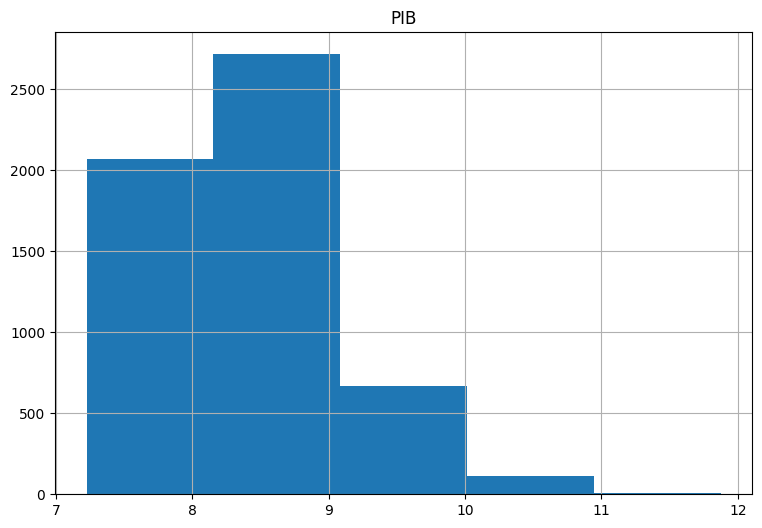

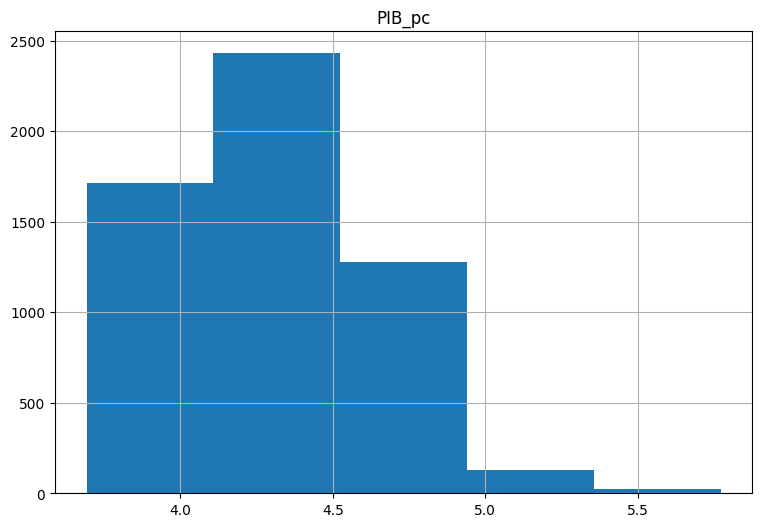

In [13]:
plota_histogramas(base_process_log10)

## 3.4) Detectando Outliers

Outliers são valores que distoam da média dos valores constantes de uma série ou conjunto de dados.


In [14]:
def plota_box (dados, coluna, municip, qtd):
    dados.boxplot(column=coluna, figsize=(9,9))
    if municip:
        maiores = dados.nlargest(qtd, coluna)
        maiores.reset_index(drop=False, inplace=True)
        maiores_filtro = maiores[['Sigla', 'Municipio', coluna]]
        print('Maiores')
        print(maiores_filtro)
        menores = dados.nsmallest(qtd, coluna)
        menores.reset_index(drop=False, inplace=True)
        menores_filtro = menores[['Sigla', 'Municipio', coluna]]
        print('Menores')
        print(menores_filtro)
    print(dados[coluna].describe())

Maiores
   Sigla              Municipio     arrec_2020
0     SP              SAO PAULO 244,017,139.96
1     RJ         RIO DE JANEIRO 133,435,616.04
2     MG         BELO HORIZONTE  64,456,365.23
3     DF               BRASILIA  48,965,655.13
4     PR               CURITIBA  44,388,357.33
5     BA               SALVADOR  43,831,700.84
6     CE              FORTALEZA  37,915,813.01
7     GO                GOIANIA  30,749,650.33
8     SP               CAMPINAS  26,570,267.74
9     RS           PORTO ALEGRE  26,086,606.56
10    SP              GUARULHOS  24,810,885.98
11    PE                 RECIFE  23,210,962.21
12    SP         RIBEIRAO PRETO  16,203,019.21
13    SP  SAO BERNARDO DE CAMPO  15,692,012.39
14    MS           CAMPO GRANDE  15,627,124.95
15    RJ            SAO GONCALO  15,468,703.98
16    SP               SOROCABA  15,427,735.22
17    SC          FLORIANOPOLIS  15,318,125.23
18    MG             UBERLANDIA  14,785,522.83
19    SP            SANTO ANDRE  14,706,273.95
20   

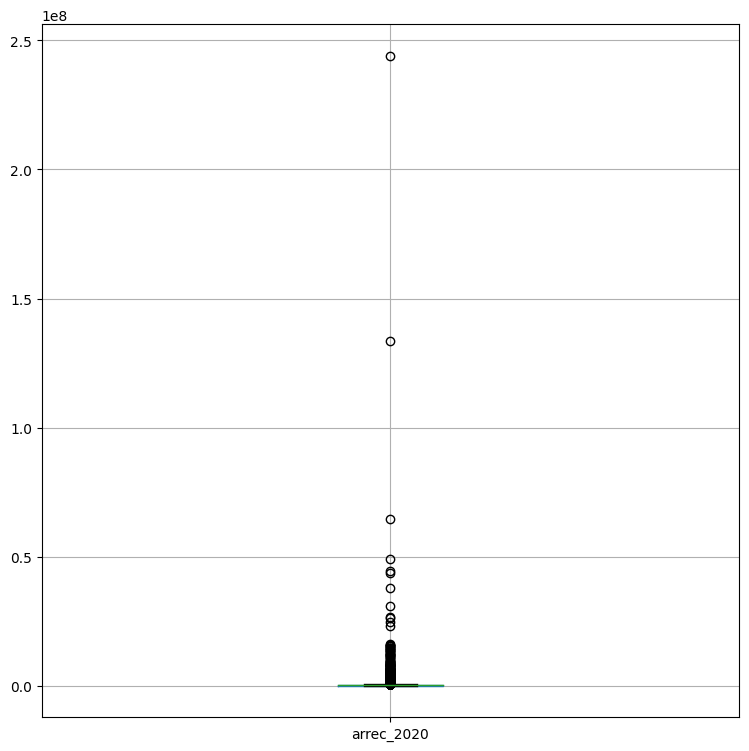

In [15]:
# Gráfico boxplot da Arrecadação de 2020 - Base original
plota_box (base, 'arrec_2020', True, 27)

count   5,567.00
mean        5.12
std         0.62
min         3.37
25%         4.68
50%         5.05
75%         5.48
max         8.39
Name: arrec_2020, dtype: float64


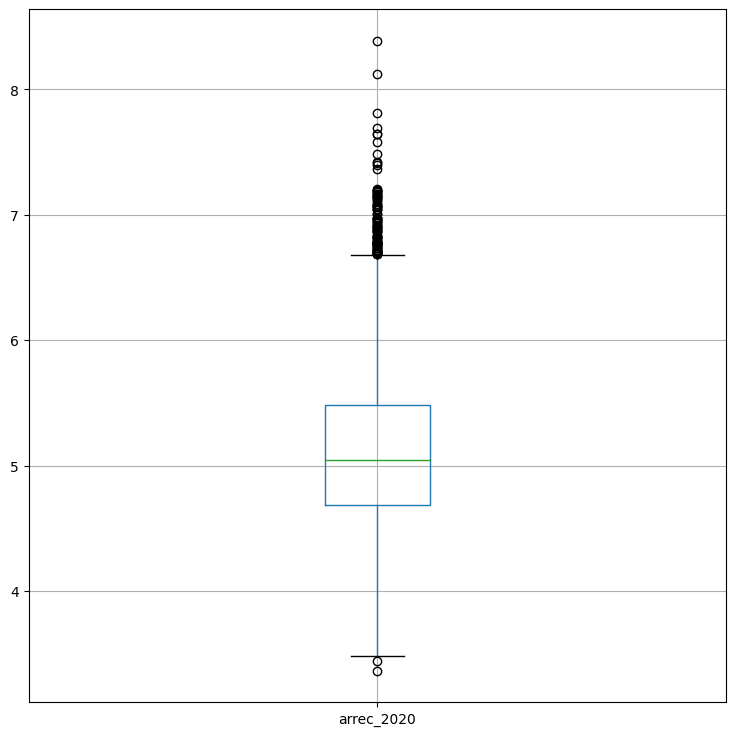

In [16]:
# Gráfico boxplot da Arrecadação de 2020 - Base Logaritmíca
plota_box (base_process_log10, 'arrec_2020', False, 27)

Função para listar os Municípios acima do índice de Inadimplência fornecido.

In [17]:
def lista_inadimplentes(base_inad, indice):
    inadimplencia = base_inad.loc[base_inad['inad_2020'] >= indice]
    print('*' * 60)
    print('Índice Percentual de Inadimplência maior que: ', indice)
    print('-' * 60)
    print('Estados   : ', inadimplencia['Sigla'].nunique())
    print('Municípios: ', inadimplencia.shape[0])
    print('-' * 30)
    inad_filtro = inadimplencia[['Estado','Sigla', 'Municipio', 'inad_2020']]
    print(inad_filtro.groupby('Estado')['Municipio'].nunique())
    print('*' * 60)
    arq_inad = 'ind_inad_' + str(indice) + '.xlsx'
    inad_filtro.to_excel(arq_inad)
    files.download(arq_inad)

Maiores
   Sigla                  Municipio  inad_2020
0     RS                    PUTINGA       0.98
1     RS                 LINHA NOVA       0.97
2     GO                NOVA AURORA       0.95
3     RS                   MONTAURI       0.95
4     RS                  SAO JORGE       0.95
5     PB               MONTE HOREBE       0.94
6     PI  CAPITAO GERVASIO OLIVEIRA       0.94
7     SC                  TUNAPOLIS       0.93
8     RS            CANUDOS DE VALE       0.93
9     MG                    MAMONAS       0.93
10    MG                  VEREDINHA       0.92
11    SC                     IOMERE       0.91
12    PI                    CAXINGO       0.91
13    PI           PEDRO LAURENTINO       0.91
14    RS             DOUTOR RICARDO       0.91
15    RS        SALVADOR DE MISSOES       0.90
16    SC                   PERITIBA       0.90
17    MG    SANTA EFIGENIA DE MINAS       0.90
18    SC                      IRATI       0.90
19    RS         SAO JOAO DE URTIGA       0.90
20   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

************************************************************
Índice Percentual de Inadimplência maior que:  0.57
------------------------------------------------------------
Estados   :  24
Municípios:  2884
------------------------------
Estado
ALAGOAS                 12
AMAZONAS                 3
BAHIA                  186
CEARÁ                   97
ESPÍRITO SANTO          51
GOIÁS                  123
MARANHÃO                22
MATO GROSSO             43
MATO GROSSO DO SUL      22
MINAS GERAIS           631
PARANÁ                 283
PARAÍBA                155
PARÁ                    13
PERNAMBUCO              59
PIAUÍ                  121
RIO DE JANEIRO          19
RIO GRANDE DO NORTE     95
RIO GRANDE DO SUL      363
RONDÔNIA                23
RORAIMA                  1
SANTA CATARINA         229
SERGIPE                 21
SÃO PAULO              294
TOCANTINS               18
Name: Municipio, dtype: int64
************************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

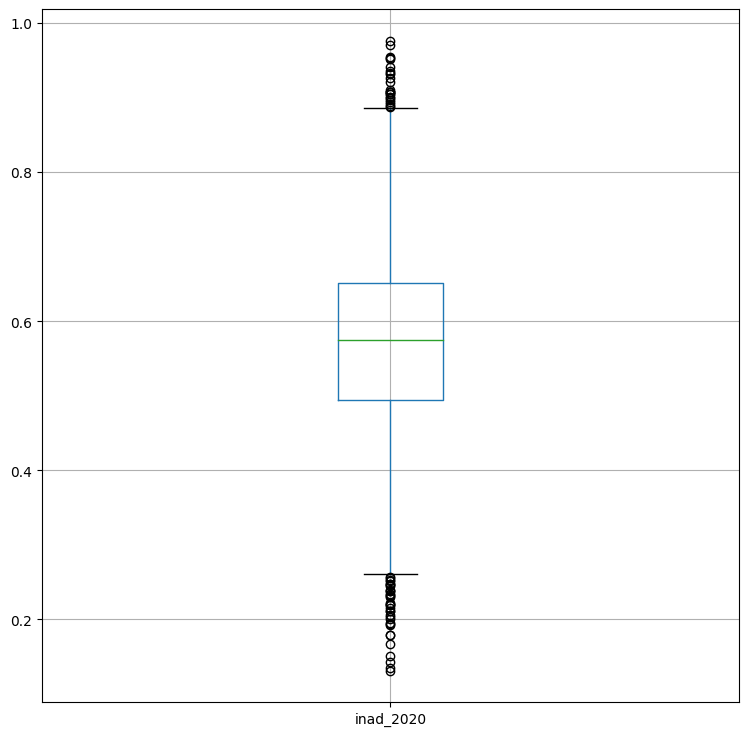

In [18]:
# Gráfico boxplot da Inadimplência de 2020 - Base Original
plota_box (base, 'inad_2020', True, 27)

# Apresenta Estados com Índices de Inadimplência parametrizado (Maior que)
lista_inadimplentes(base, 0.75)
lista_inadimplentes(base, 0.57)

Maiores
   Sigla               Municipio    Valor_ab_agro
0     BA           SAO DESIDERIO 3,533,041,014.00
1     BA    FORMOSA DE RIO PRETO 2,852,056,693.00
2     MT                 SORRISO 2,538,456,489.00
3     MT                 SAPEZAL 2,161,715,761.00
4     GO               RIO VERDE 2,151,627,641.00
5     MT   CAMPO NOVO DE PARECIS 2,069,467,534.00
6     MT              DIAMANTINO 2,059,322,294.00
7     MA                  BALSAS 1,804,430,114.00
8     MA           TASSO FRAGOSO 1,802,825,466.00
9     BA               BARREIRAS 1,761,538,179.00
10    MT              NOVA MUTUM 1,721,125,808.00
11    SP                 ITAPEVA 1,670,514,407.00
12    GO              CRISTALINA 1,656,213,014.00
13    DF                BRASILIA 1,623,976,909.00
14    MT            NOVA UBIRATA 1,585,711,986.00
15    MT             CAMPO VERDE 1,578,983,525.00
16    MS                MARACAJU 1,553,010,873.00
17    GO                   JATAI 1,551,688,090.00
18    MS              PONTA PORA 1,445,620

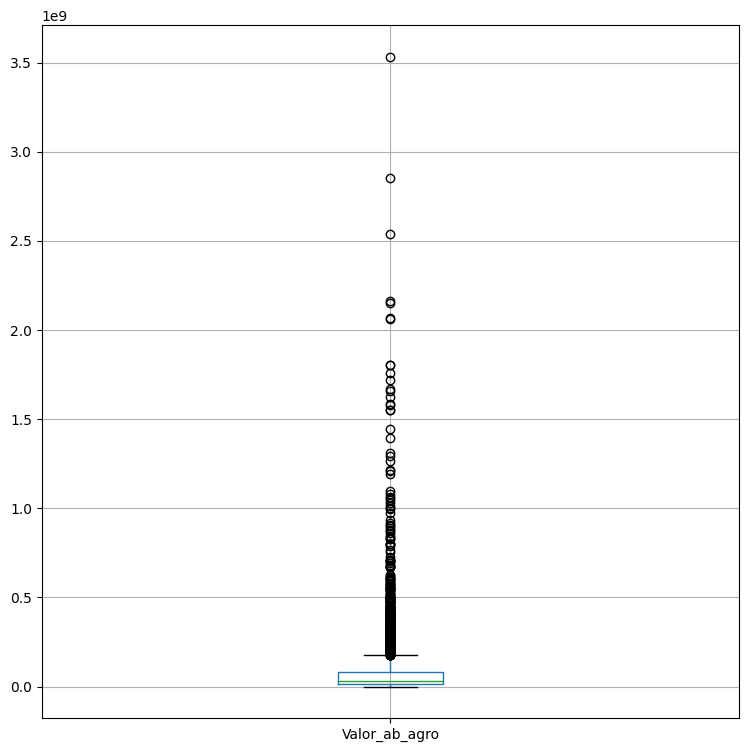

In [19]:
# Gráfico boxplot da Valor Agregado do Agro do IBGE de 2020 - Base Original
plota_box (base, 'Valor_ab_agro', True, 27)

count   5,567.00
mean        7.51
std         0.67
min       -10.00
25%         7.14
50%         7.53
75%         7.90
max         9.55
Name: Valor_ab_agro, dtype: float64


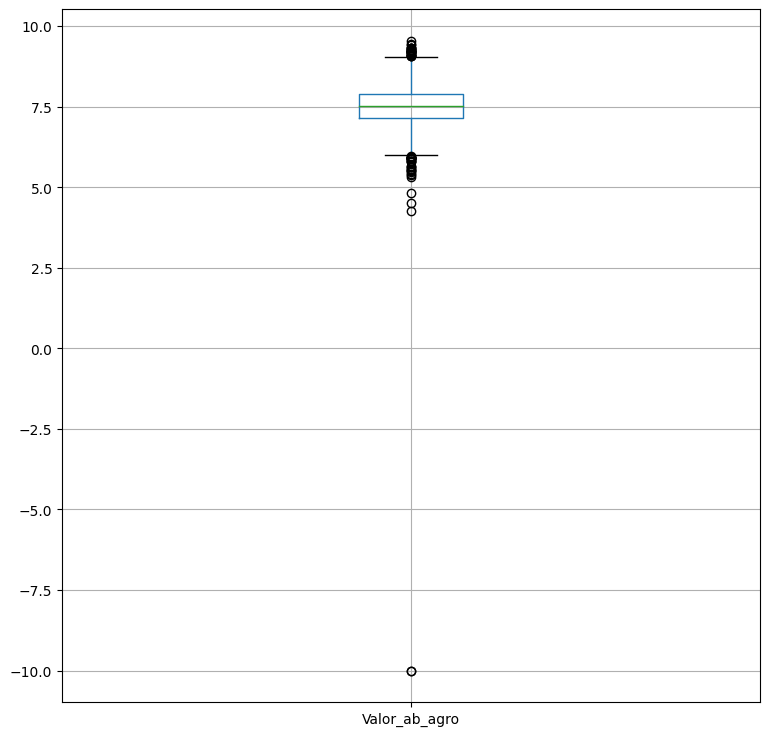

In [20]:
# Gráfico boxplot da Valor Agregado do Agro do IBGE de 2020 - Base Logarítmica
plota_box (base_process_log10, 'Valor_ab_agro', False, 1)

Maiores
   Sigla              Municipio     Valor_ab_indu
0     SP              SAO PAULO 58,077,783,601.00
1     RJ         RIO DE JANEIRO 36,666,722,636.00
2     AM                 MANAUS 33,272,165,044.00
3     PA            PARAUAPEBAS 30,269,435,874.00
4     RJ                 MARICA 23,696,340,109.00
5     PA       CANAA DE CARAJAS 19,434,709,308.00
6     SP               PAULINIA 18,444,196,167.00
7     RJ                NITEROI 16,082,117,671.00
8     MG         BELO HORIZONTE 15,188,789,418.00
9     PR               CURITIBA 14,635,594,178.00
10    SP     SAO JOSE DE CAMPOS 13,484,972,532.00
11    SP              GUARULHOS 13,275,910,317.00
12    RJ        DUQUE DE CAXIAS 12,498,227,056.00
13    PR          FOZ DE IGUACU 11,078,328,334.00
14    DF               BRASILIA 10,942,472,569.00
15    MG                  BETIM 10,807,858,939.00
16    BA               CAMACARI 10,382,610,188.00
17    PR              ARAUCARIA 10,127,951,516.00
18    SP  SAO BERNARDO DE CAMPO  9,958,694

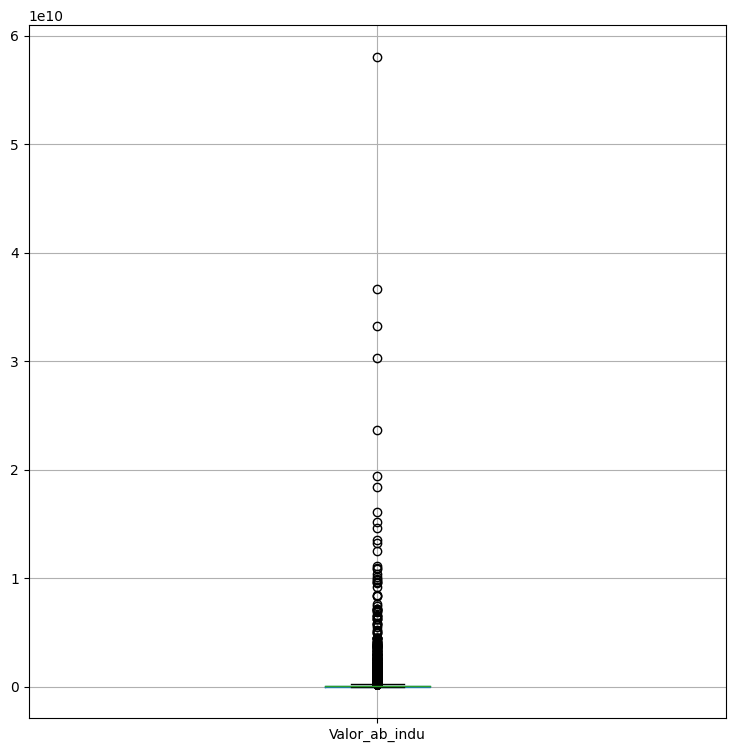

In [21]:
# Gráfico boxplot da Valor Agregado da Indústria do IBGE de 2020 - Base Original
plota_box (base, 'Valor_ab_indu', True, 27)

print(base.loc[base['Valor_ab_indu'] >= 5000000000])

count   5,567.00
mean        7.35
std         0.87
min         5.64
25%         6.66
50%         7.18
75%         7.94
max        10.76
Name: Valor_ab_indu, dtype: float64


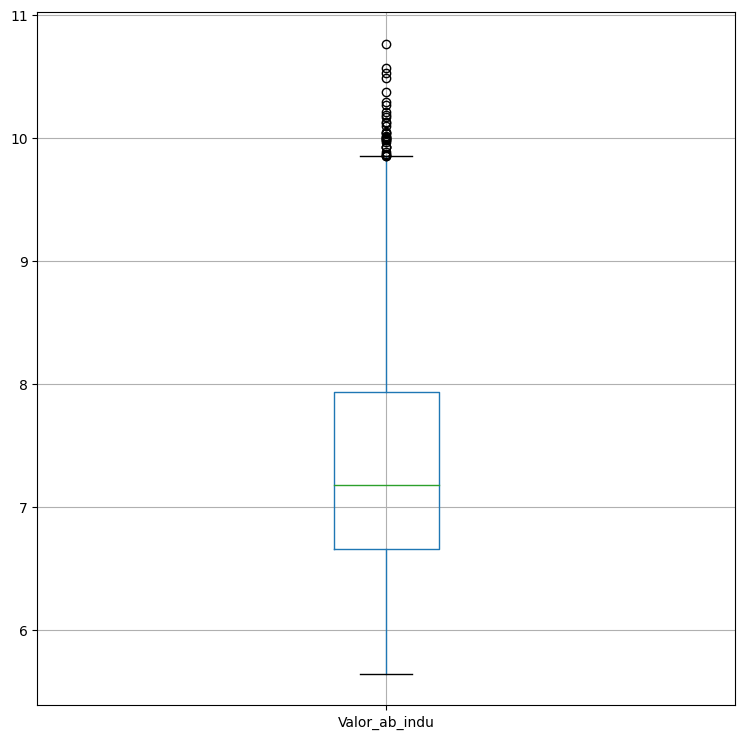

In [22]:
# Gráfico boxplot da Valor Agregado da Indústria do IBGE de 2020 - Base Logarítmica
plota_box (base_process_log10, 'Valor_ab_indu', False, 1)

Maiores
   Sigla              Municipio      Valor_ab_serv
0     SP              SAO PAULO 520,357,968,893.00
1     RJ         RIO DE JANEIRO 180,098,159,183.00
2     DF               BRASILIA 116,547,655,370.00
3     MG         BELO HORIZONTE  58,130,693,212.00
4     SP                 OSASCO  56,542,987,134.00
5     RS           PORTO ALEGRE  52,893,268,491.00
6     PR               CURITIBA  49,414,129,618.00
7     SP               CAMPINAS  38,679,638,258.00
8     CE              FORTALEZA  38,074,102,115.00
9     SP              GUARULHOS  35,706,428,313.00
10    BA               SALVADOR  35,251,370,489.00
11    SP                BARUERI  32,268,423,280.00
12    GO                GOIANIA  30,225,893,393.00
13    AM                 MANAUS  29,327,359,820.00
14    PE                 RECIFE  28,435,778,929.00
15    SP                JUNDIAI  27,099,000,845.00
16    SP  SAO BERNARDO DE CAMPO  26,418,792,834.00
17    SP         RIBEIRAO PRETO  24,629,555,545.00
18    RJ        DUQUE D

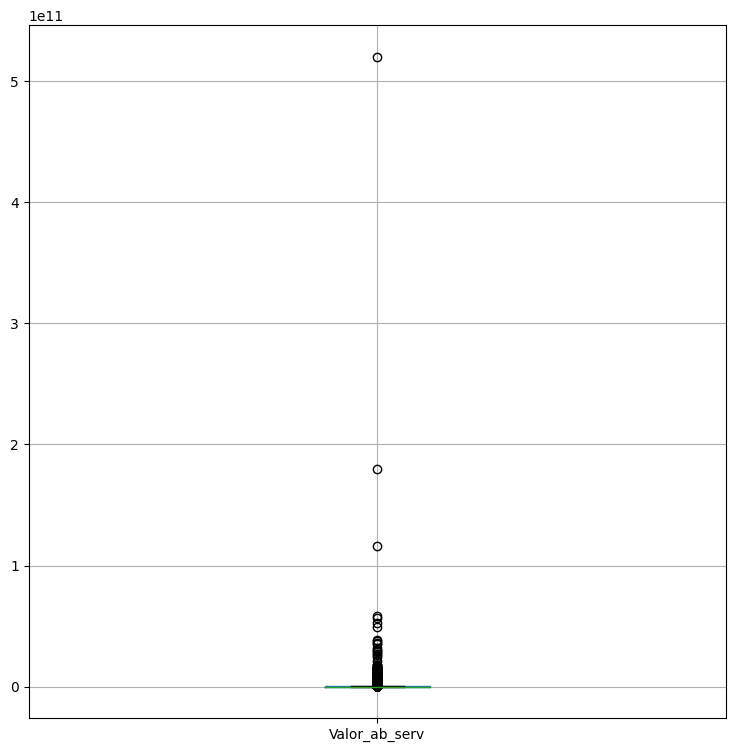

In [23]:
# Gráfico boxplot da Valor Agregado dos Serviços do IBGE de 2020 - Base Original
plota_box (base, 'Valor_ab_serv', True, 27)

count   5,567.00
mean        7.88
std         0.70
min         6.41
25%         7.36
50%         7.76
75%         8.26
max        11.72
Name: Valor_ab_serv, dtype: float64


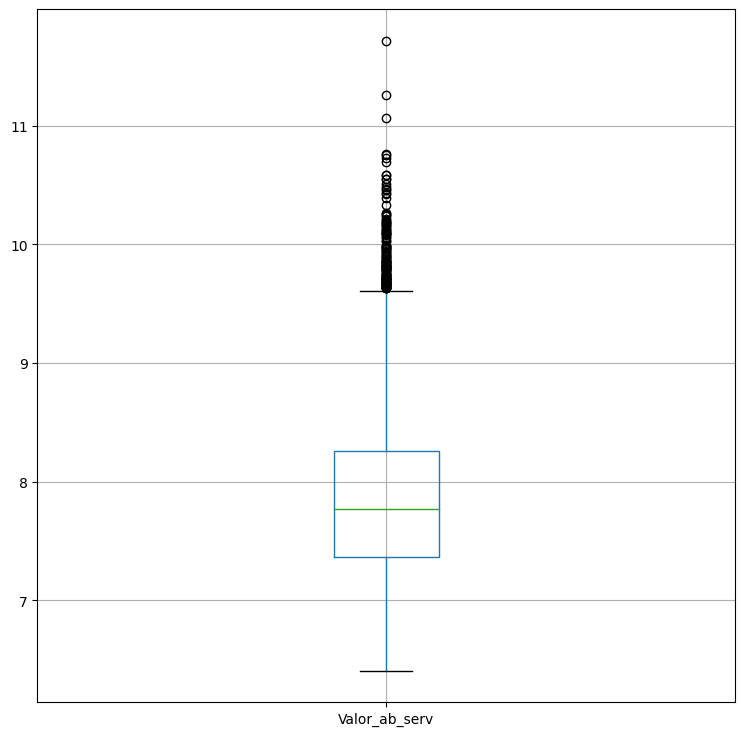

In [24]:
# Gráfico boxplot da Valor Agregado dos Serviços do IBGE de 2020 - Base Logarítmica
plota_box (base_process_log10, 'Valor_ab_serv', False, 1)

Maiores
   Sigla             Municipio      Valor_ab_publ
0     DF              BRASILIA 111,267,001,381.00
1     RJ        RIO DE JANEIRO  54,434,941,786.00
2     SP             SAO PAULO  45,912,212,278.00
3     MG        BELO HORIZONTE  12,300,753,293.00
4     AM                MANAUS  10,205,706,211.00
5     CE             FORTALEZA   9,816,311,687.00
6     BA              SALVADOR   8,967,373,260.00
7     PR              CURITIBA   8,961,240,965.00
8     RS          PORTO ALEGRE   7,306,472,157.00
9     PE                RECIFE   7,241,480,028.00
10    GO               GOIANIA   7,180,179,749.00
11    RJ           SAO GONCALO   7,164,164,140.00
12    RJ       DUQUE DE CAXIAS   6,525,269,069.00
13    MS          CAMPO GRANDE   6,308,424,973.00
14    SP             GUARULHOS   5,711,692,230.00
15    RJ           NOVA IGUACU   5,608,451,982.00
16    PA                 BELEM   5,430,461,736.00
17    SP              CAMPINAS   4,932,926,602.00
18    AP                MACAPA   4,788,405

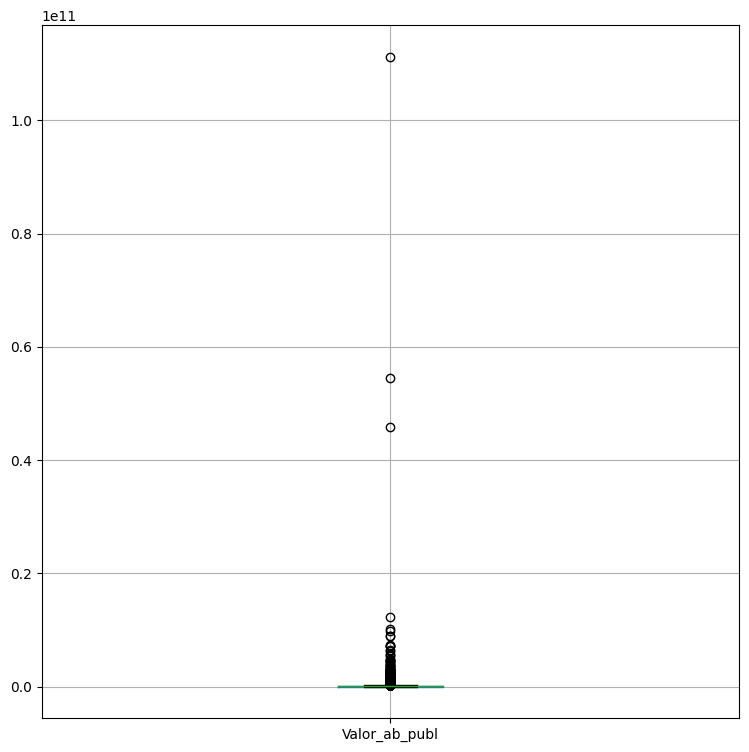

In [25]:
# Gráfico boxplot da Valor Agregado de Serviços Públicos do IBGE de 2020 - Base Original
plota_box (base, 'Valor_ab_publ', True, 27)

count   5,567.00
mean        7.84
std         0.48
min         6.95
25%         7.48
50%         7.77
75%         8.10
max        11.05
Name: Valor_ab_publ, dtype: float64


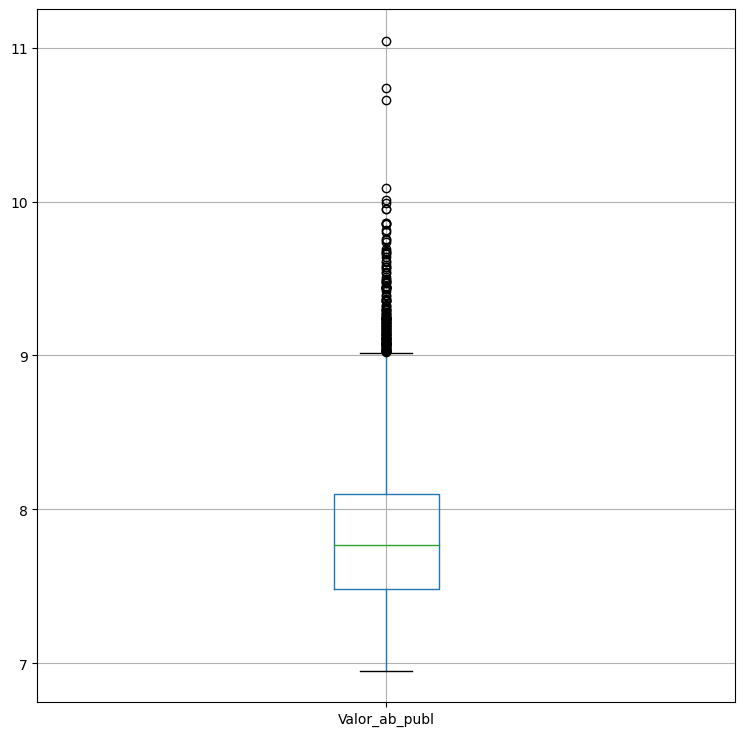

In [26]:
# Gráfico boxplot da Valor Agregado de Serviços Públicos do IBGE de 2020 - Base Logarítmica
plota_box (base_process_log10, 'Valor_ab_publ', False, 1)

Maiores
   Sigla              Municipio          Valor_abt
0     SP              SAO PAULO 624,409,861,153.00
1     RJ         RIO DE JANEIRO 271,304,888,240.00
2     DF               BRASILIA 240,381,106,228.00
3     MG         BELO HORIZONTE  85,623,345,675.00
4     PR               CURITIBA  73,027,409,991.00
5     AM                 MANAUS  72,970,165,105.00
6     RS           PORTO ALEGRE  66,095,392,584.00
7     SP                 OSASCO  63,377,281,663.00
8     CE              FORTALEZA  55,649,368,508.00
9     SP              GUARULHOS  54,753,119,623.00
10    SP               CAMPINAS  53,364,538,386.00
11    BA               SALVADOR  50,766,196,107.00
12    GO                GOIANIA  44,877,927,420.00
13    PE                 RECIFE  41,456,507,531.00
14    RJ        DUQUE DE CAXIAS  40,493,417,905.00
15    SP  SAO BERNARDO DE CAMPO  39,856,385,608.00
16    SP                BARUERI  39,482,997,035.00
17    SP                JUNDIAI  39,278,730,712.00
18    RJ               

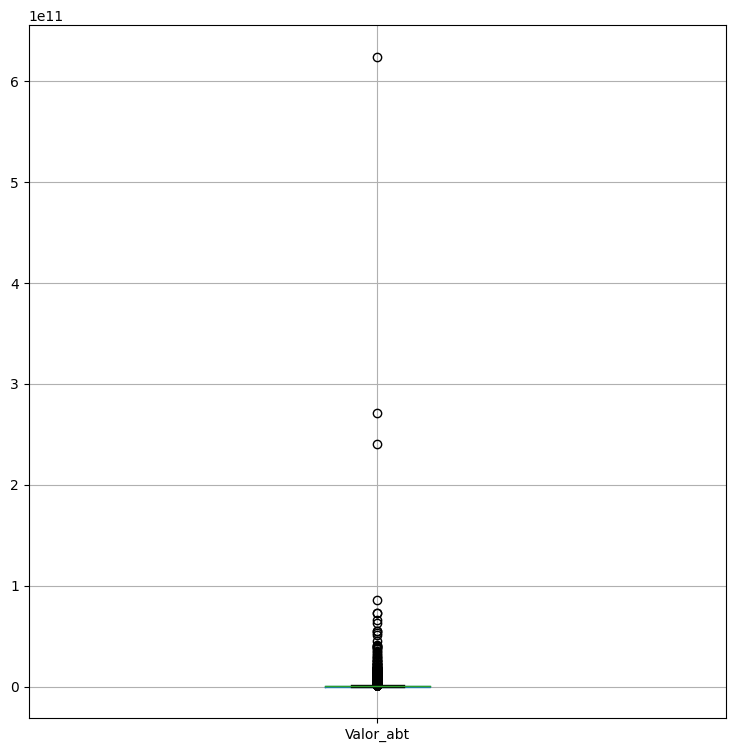

In [27]:

# Gráfico boxplot da Valor Agregado do IBGE de 2020 - Base Original
plota_box (base, 'Valor_abt', True, 27)

count   5,567.00
mean        8.40
std         0.60
min         7.21
25%         7.97
50%         8.31
75%         8.73
max        11.80
Name: Valor_abt, dtype: float64


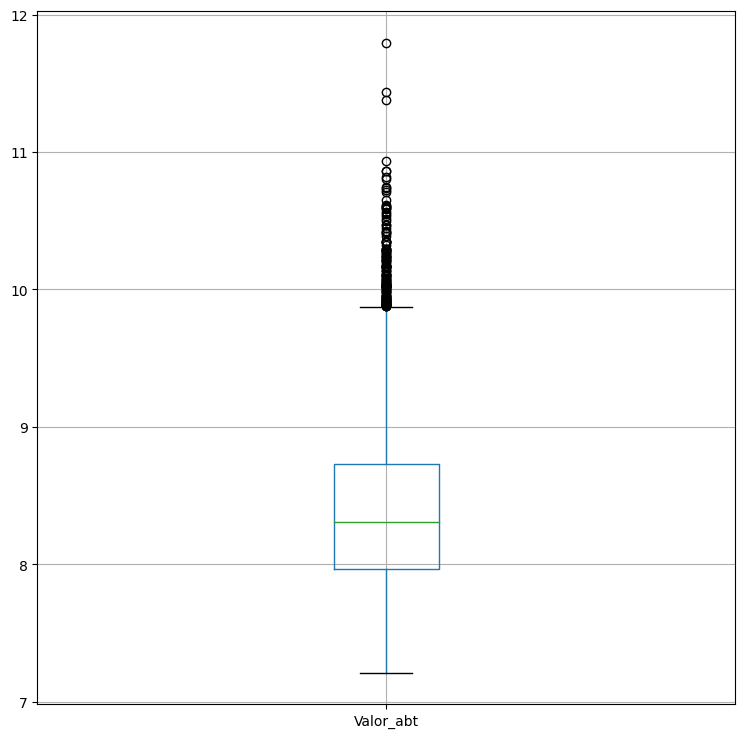

In [28]:
# Gráfico boxplot da Valor Agregado do IBGE de 2020 - Base Logarítmica
plota_box (base_process_log10, 'Valor_abt', False, 1)

Maiores
   Sigla              Municipio           Impostos
0     SP              SAO PAULO 124,349,145,812.00
1     RJ         RIO DE JANEIRO  59,975,013,787.00
2     DF               BRASILIA  25,466,227,775.00
3     AM                 MANAUS  18,798,608,387.00
4     PR               CURITIBA  15,281,318,407.00
5     SC                 ITAJAI  14,002,186,785.00
6     SP                 OSASCO  12,934,532,055.00
7     SP               CAMPINAS  12,055,178,430.00
8     SP                JUNDIAI  11,956,318,933.00
9     MG         BELO HORIZONTE  11,886,547,663.00
10    SP                BARUERI  11,771,574,927.00
11    SP              GUARULHOS  11,096,191,278.00
12    RS           PORTO ALEGRE   9,979,170,497.00
13    CE              FORTALEZA   9,511,524,751.00
14    PE                 RECIFE   8,854,494,005.00
15    SP  SAO BERNARDO DE CAMPO   8,757,956,446.00
16    MG             UBERLANDIA   8,378,969,176.00
17    SC              JOINVILLE   8,200,961,339.00
18    BA               

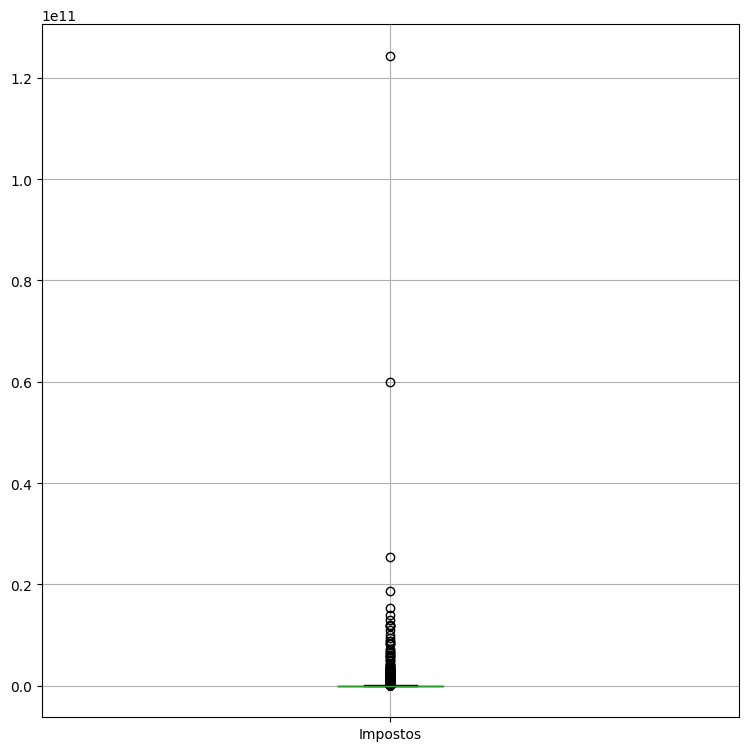

In [29]:
# Gráfico boxplot dos Impostos da base do PIB do IBGE de 2020 - Base Original
plota_box (base, 'Impostos', True, 27)

count   5,567.00
mean        7.20
std         0.78
min         5.60
25%         6.61
50%         7.07
75%         7.66
max        11.09
Name: Impostos, dtype: float64


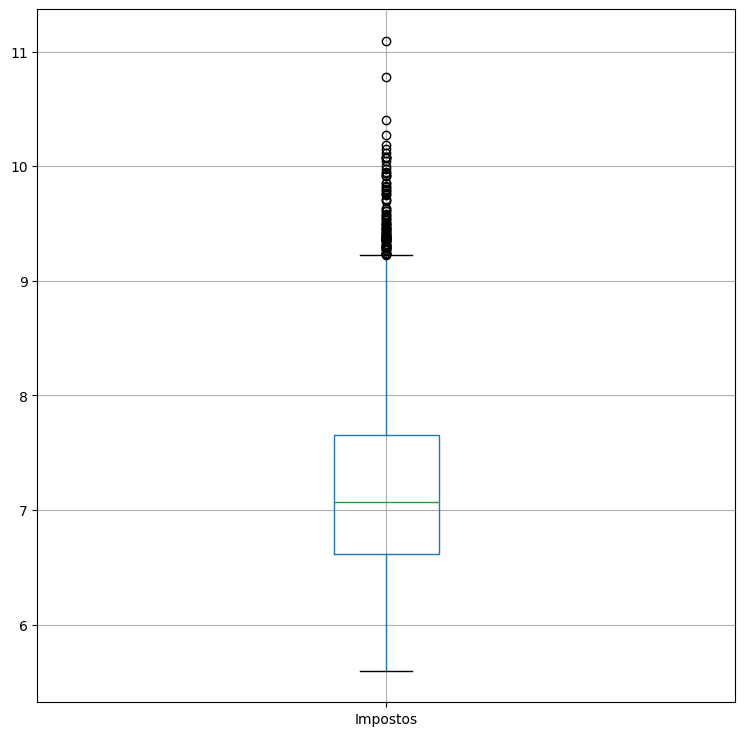

In [30]:
# Gráfico boxplot dos Impostos da base do PIB do IBGE de 2020 - Base Logarítmica
plota_box (base_process_log10, 'Impostos', False, 1)

Maiores
   Sigla              Municipio                PIB
0     SP              SAO PAULO 748,759,006,965.00
1     RJ         RIO DE JANEIRO 331,279,902,027.00
2     DF               BRASILIA 265,847,334,003.00
3     MG         BELO HORIZONTE  97,509,893,337.00
4     AM                 MANAUS  91,768,773,491.00
5     PR               CURITIBA  88,308,728,398.00
6     SP                 OSASCO  76,311,813,717.00
7     RS           PORTO ALEGRE  76,074,563,081.00
8     SP              GUARULHOS  65,849,310,902.00
9     SP               CAMPINAS  65,419,716,816.00
10    CE              FORTALEZA  65,160,893,259.00
11    BA               SALVADOR  58,938,115,103.00
12    GO                GOIANIA  51,961,311,268.00
13    SP                BARUERI  51,254,571,962.00
14    SP                JUNDIAI  51,235,049,644.00
15    PE                 RECIFE  50,311,001,536.00
16    SP  SAO BERNARDO DE CAMPO  48,614,342,054.00
17    RJ        DUQUE DE CAXIAS  47,153,673,080.00
18    RJ               

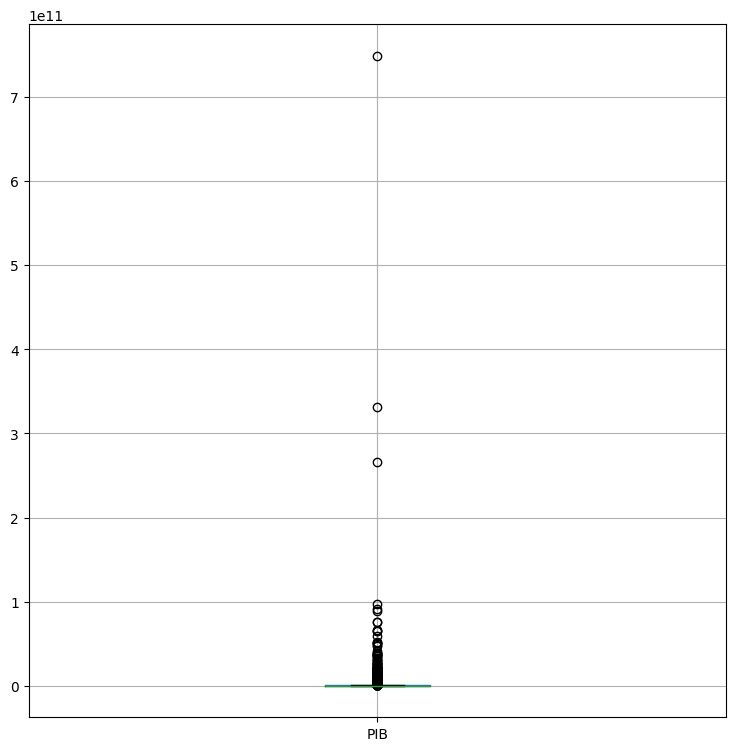

In [31]:
# Gráfico boxplot do PIB do IBGE de 2020 - Base Original
plota_box (base, 'PIB', True, 27)

count   5,567.00
mean        8.43
std         0.61
min         7.22
25%         7.99
50%         8.34
75%         8.77
max        11.87
Name: PIB, dtype: float64


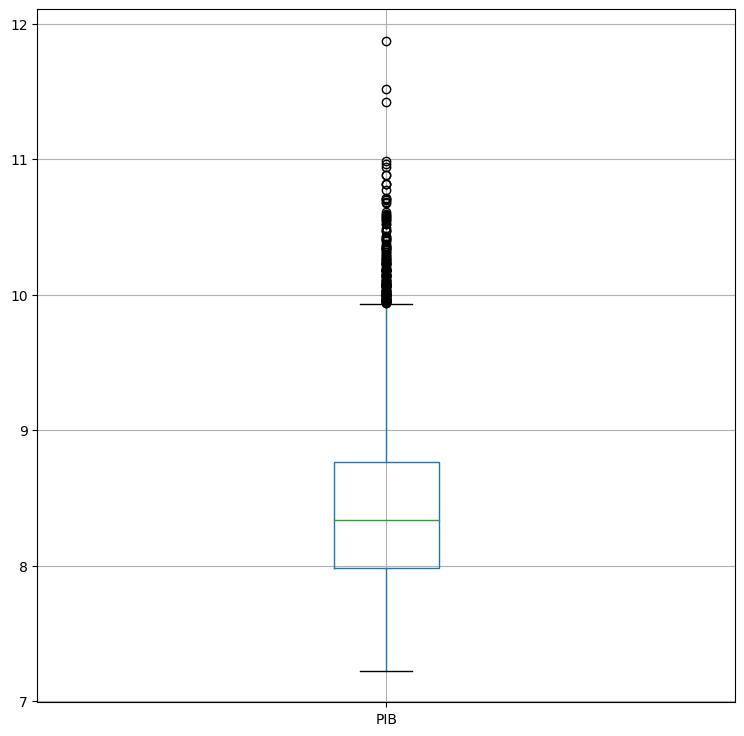

In [32]:
# Gráfico boxplot do PIB do IBGE de 2020 - Base Logarítmica
plota_box (base_process_log10, 'PIB', False, 1)

Maiores
   Sigla                  Municipio     PIB_pc
0     PA           CANAA DE CARAJAS 591,101.11
1     MS                   SELVIRIA 406,011.00
2     SP                   LOUVEIRA 357,104.23
3     SP                   PAULINIA 344,390.47
4     SP             GAVIAO PEIXOTO 333,943.43
5     MG                    EXTREMA 311,128.82
6     SP                   ILHABELA 302,099.40
7     ES         PRESIDENTE KENNEDY 301,474.89
8     BA     SAO FRANCISCO DE CONDE 296,357.52
9     GO                DAVINOPOLIS 288,689.93
10    MT            CAMPOS DE JULIO 270,716.88
11    SP                    CAJAMAR 266,875.13
12    MA              TASSO FRAGOSO 260,020.65
13    MT    SANTA RITA DE TRIVELATO 256,227.98
14    MG                    JECEABA 256,221.87
15    SP                    QUEIROZ 251,248.25
16    PA           VITORIA DE XINGU 250,970.45
17    RS                    TRIUNFO 241,634.52
18    RS                  IMIGRANTE 240,070.40
19    MG   CONCEICAO DE MATO DENTRO 239,333.24
20   

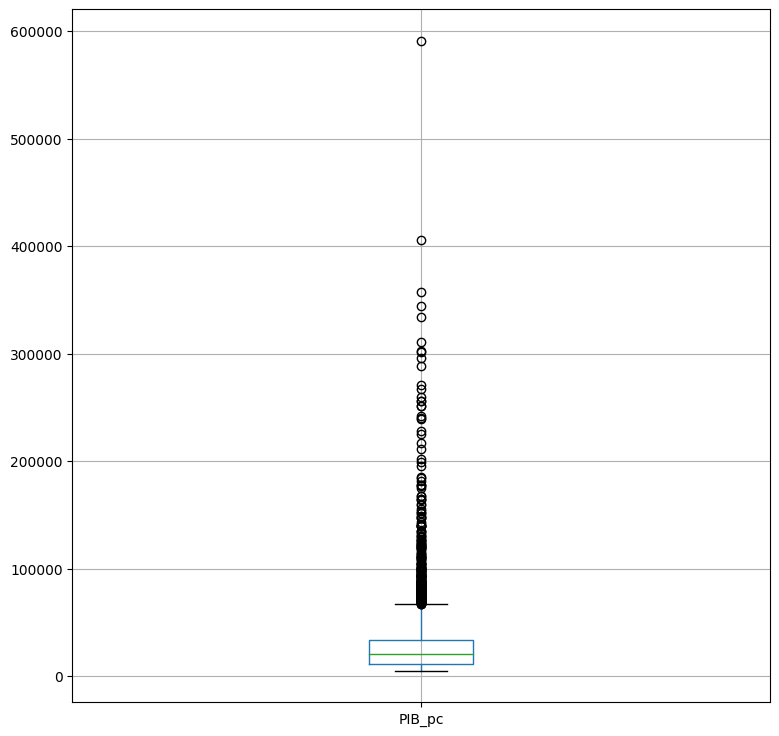

In [33]:
# Gráfico boxplot da PIB per capita do IBGE de 2020 - Base Original
plota_box (base, 'PIB_pc', True, 27)

count   5,567.00
mean        4.32
std         0.30
min         3.69
25%         4.06
50%         4.30
75%         4.53
max         5.77
Name: PIB_pc, dtype: float64


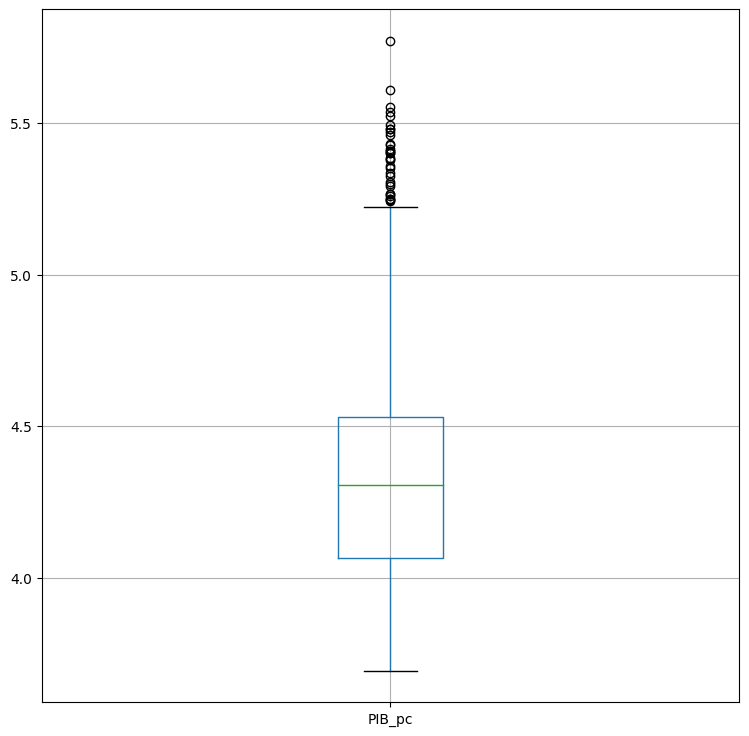

In [34]:
# Gráfico boxplot da PIB per capita do IBGE de 2020 - Base Logarítmica
plota_box (base_process_log10, 'PIB_pc', False, 1)

# -----------------------------------*********************************************----------------------------------****--------------------------------------
# 4) Correlação



## 4.1) Scater Plot

Matriz de dispersão da base em escala logatítmica base 10

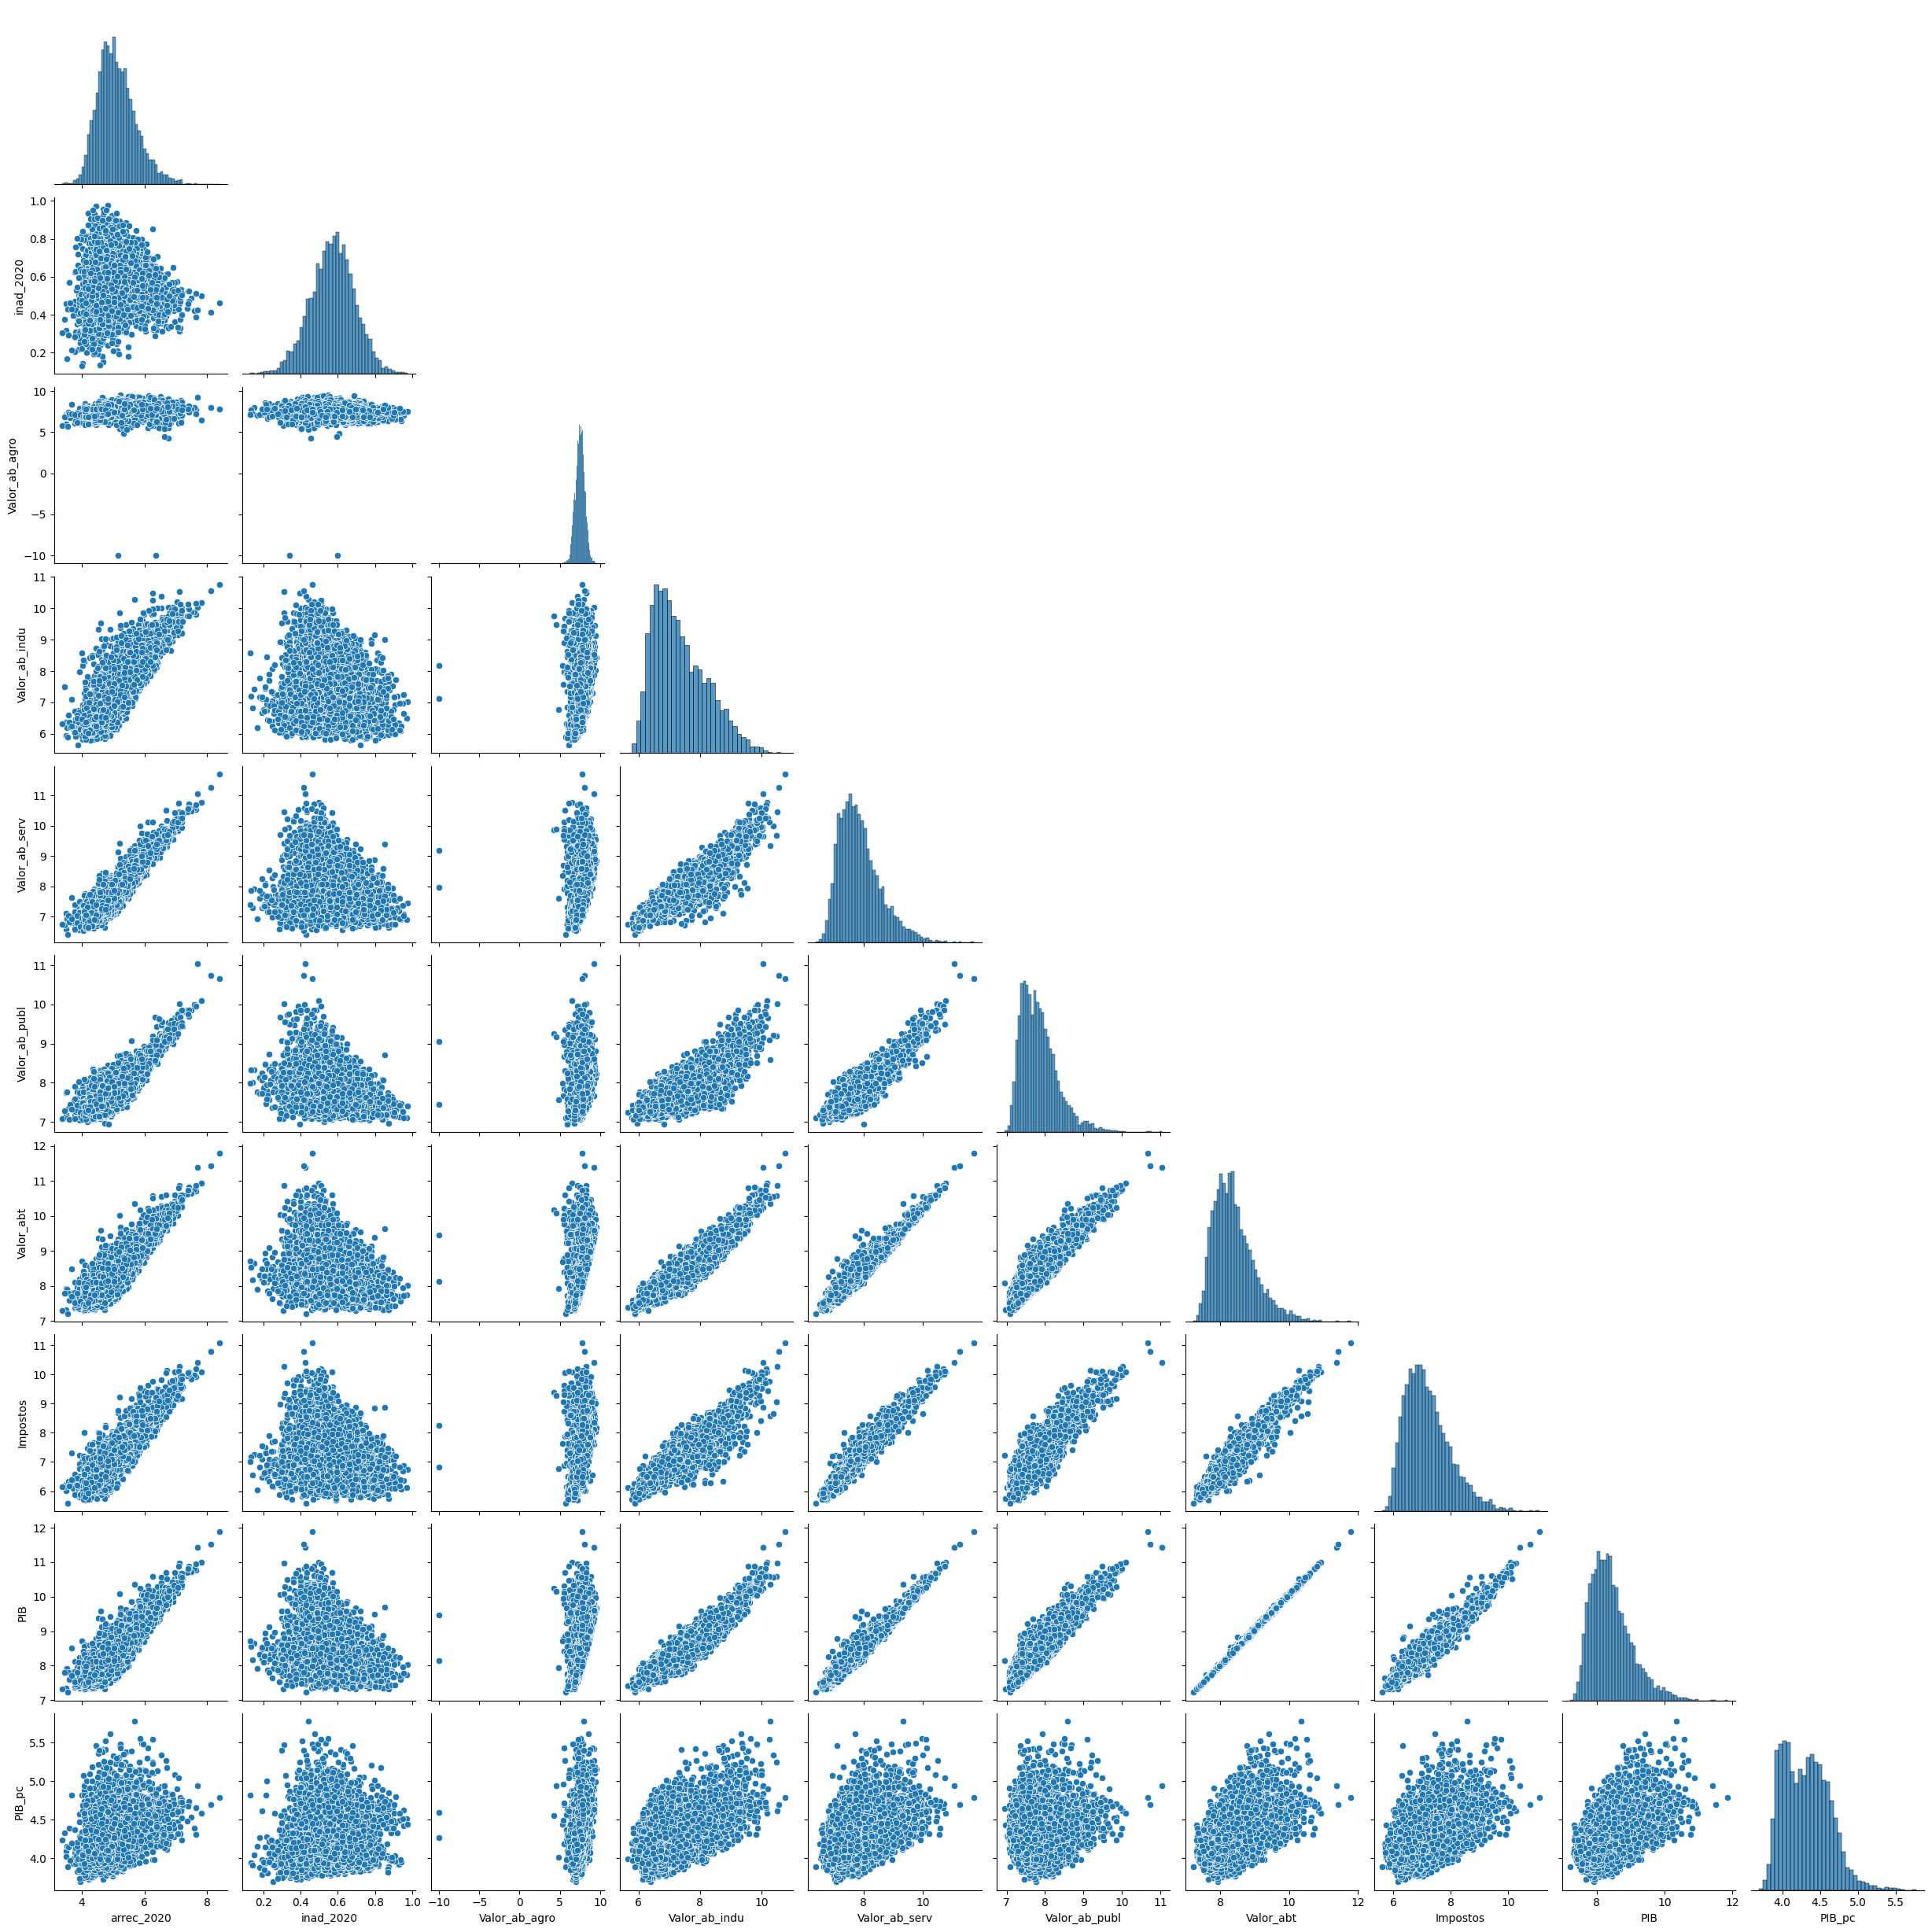

In [35]:
col_flt = list(base_process_log10.dtypes[base_process_log10.dtypes == 'float64'].index)
sns.pairplot(base_process_log10[col_flt], corner=True)

Matriz de dispersão da base com dados em seus valores originais

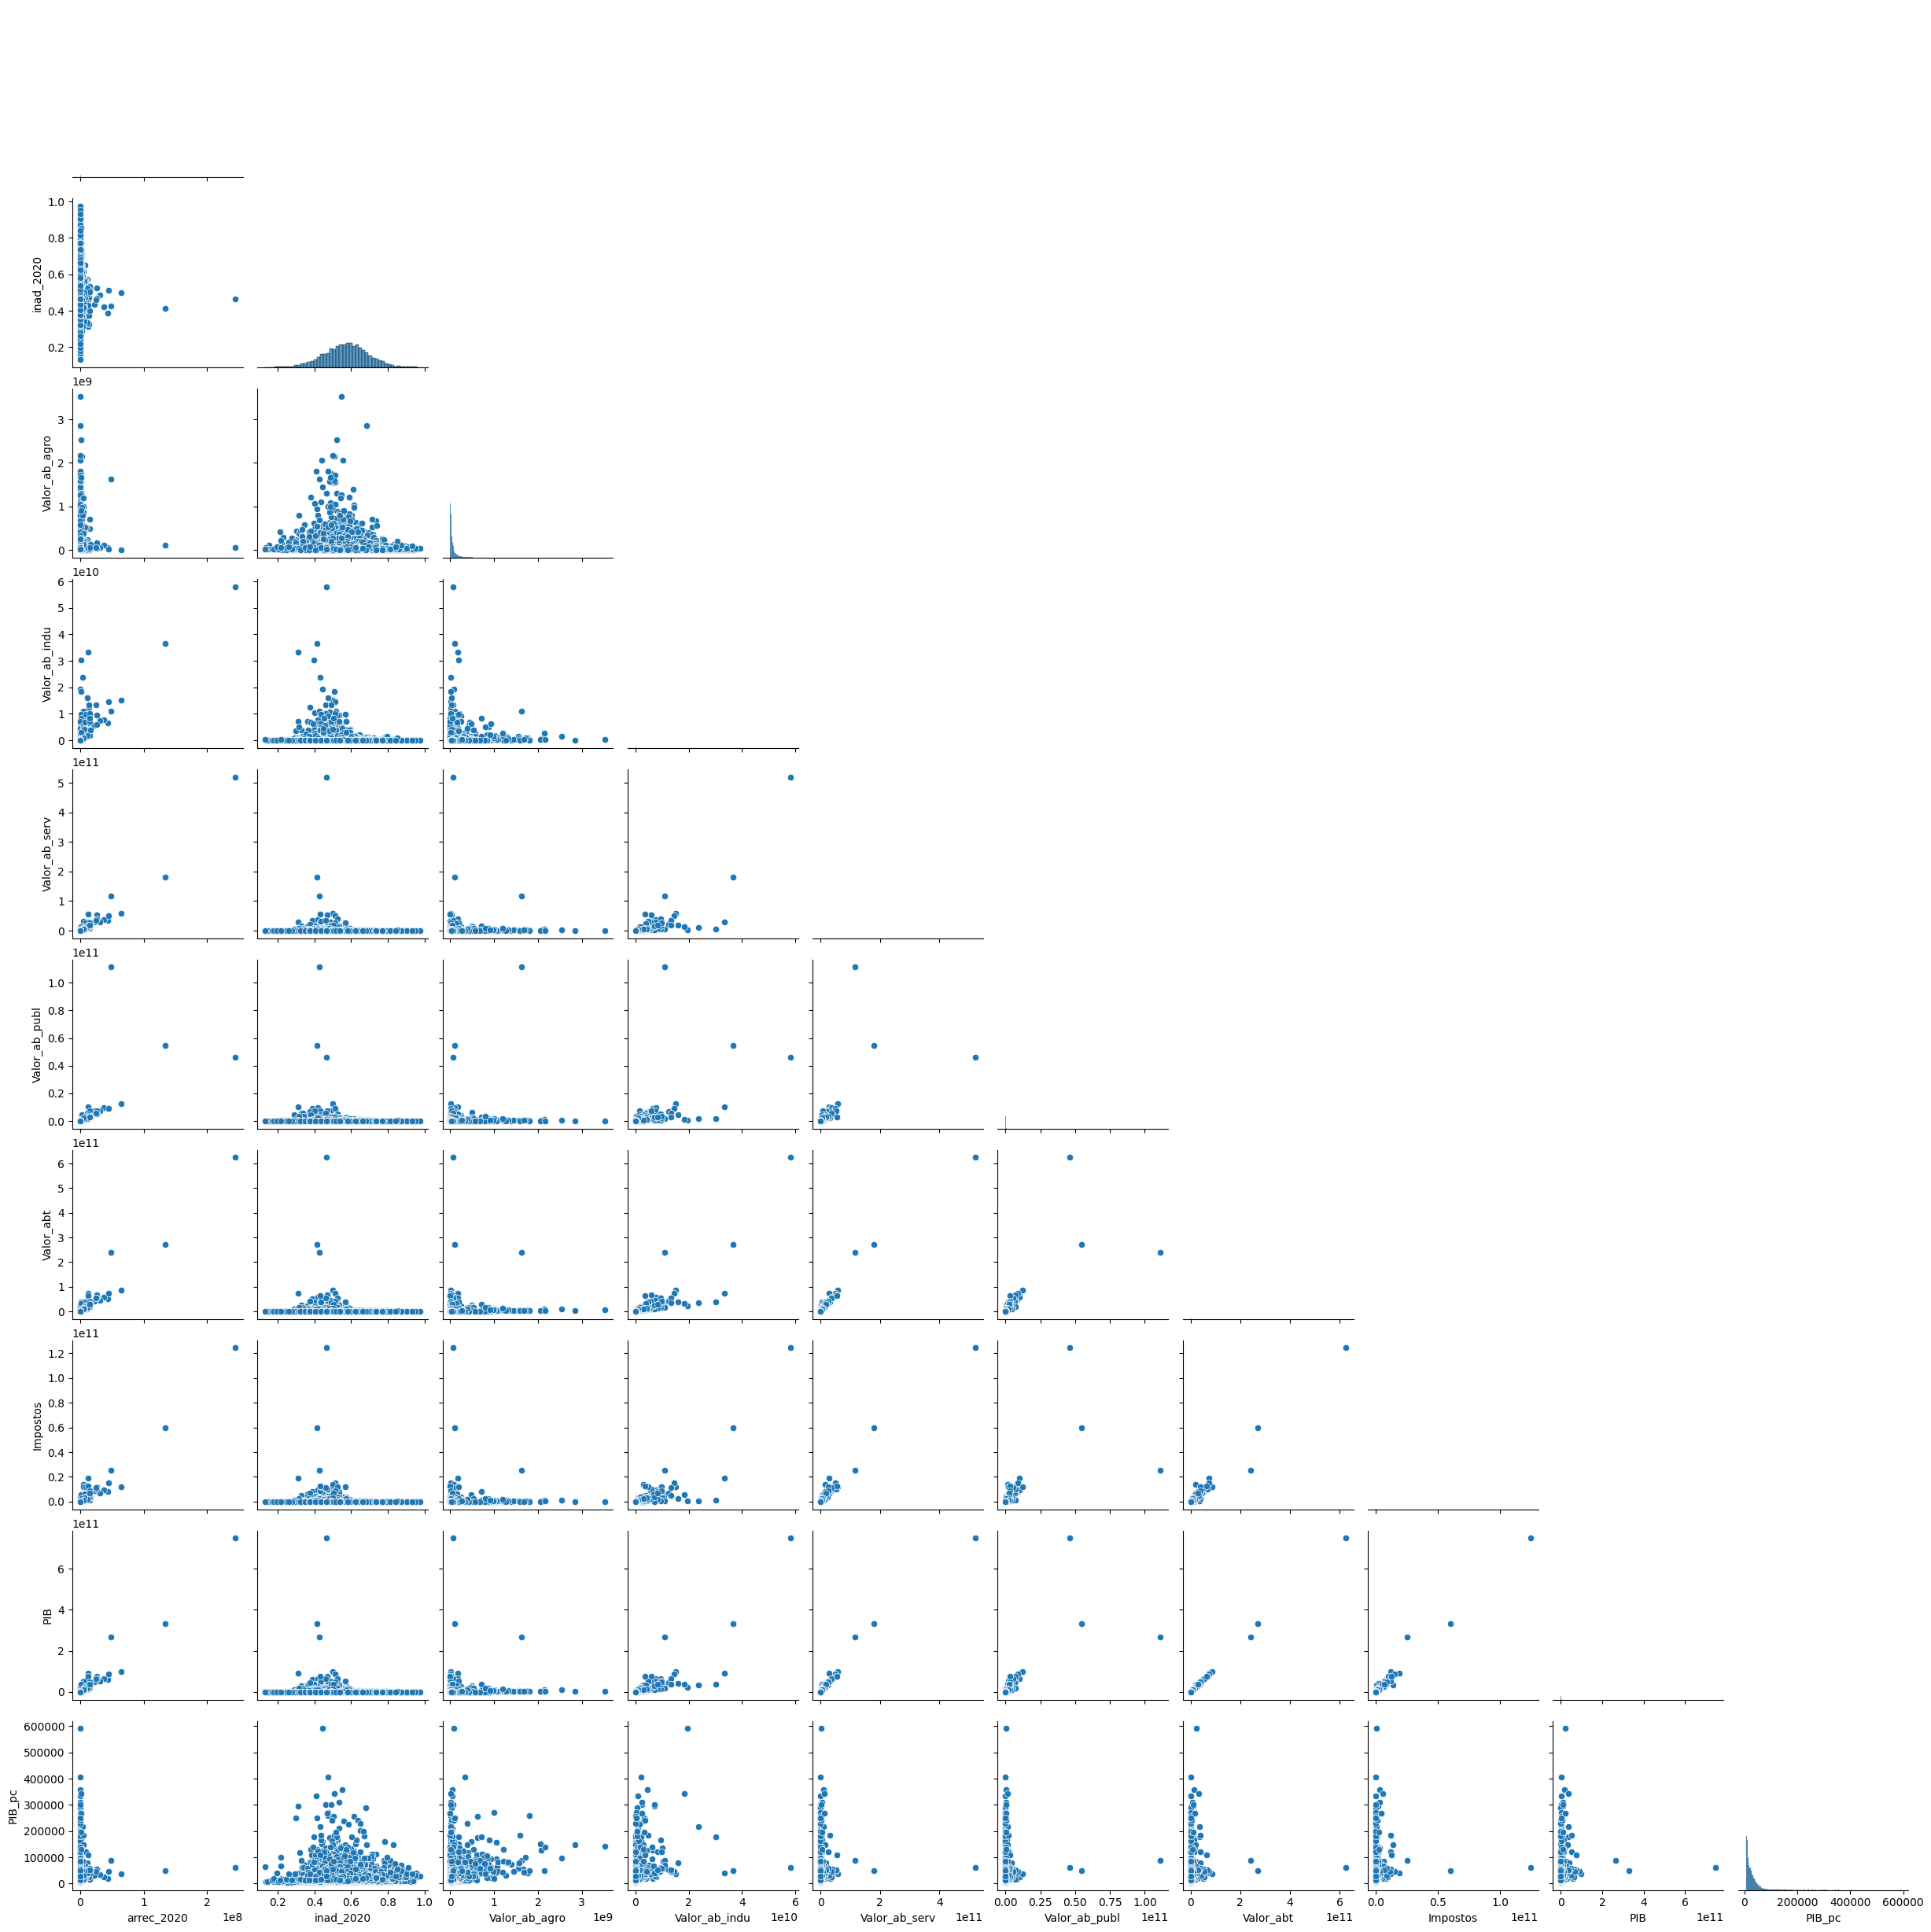

In [36]:
col_flt_bp = list(base_processamento.dtypes[base_processamento.dtypes == 'float64'].index)
sns.pairplot(base_processamento[col_flt_bp], corner=True)

## 4.2) Detecção do Coeficiente de Correlação de Pearson entre as variáveis e o Label.

In [37]:
campos = base_process_log10.dtypes[base_process_log10.dtypes != 'object'].index
base_correlacao = np.corrcoef(base_process_log10[campos].transpose())
correlacao = pd.DataFrame(data=base_correlacao, index=campos, columns=campos)

In [38]:
# Baixas correlações com o Label - inad_2020
correl_label = pd.DataFrame()
correl_label = correlacao['inad_2020'].abs().sort_values(ascending=False)
print('*' * 65)
print('Correlação entre o Label e demais variáveis da base_process_log10')
print('*' * 65)
print(correl_label)

*****************************************************************
Correlação entre o Label e demais variáveis da base_process_log10
*****************************************************************
inad_2020       1.00
Valor_ab_publ   0.36
Valor_abt       0.25
PIB             0.24
Est_AM          0.22
Est_MA          0.21
Est_RS          0.21
Est_MG          0.20
Est_PA          0.19
Valor_ab_serv   0.18
Impostos        0.18
Valor_ab_indu   0.16
Est_SC          0.15
Est_TO          0.14
Est_AP          0.13
Est_AC          0.10
Est_AL          0.10
Est_RJ          0.10
Est_RR          0.09
Est_PB          0.09
PIB_pc          0.09
Est_PR          0.08
Est_MT          0.06
Est_SE          0.06
Est_MS          0.06
Est_PE          0.05
Est_BA          0.05
Est_SP          0.04
arrec_2020      0.03
Valor_ab_agro   0.03
Est_RN          0.03
Est_RO          0.03
Est_PI          0.02
Est_ES          0.02
Est_CE          0.02
Est_DF          0.02
Est_GO          0.00
Name: inad_2020, dtype: f

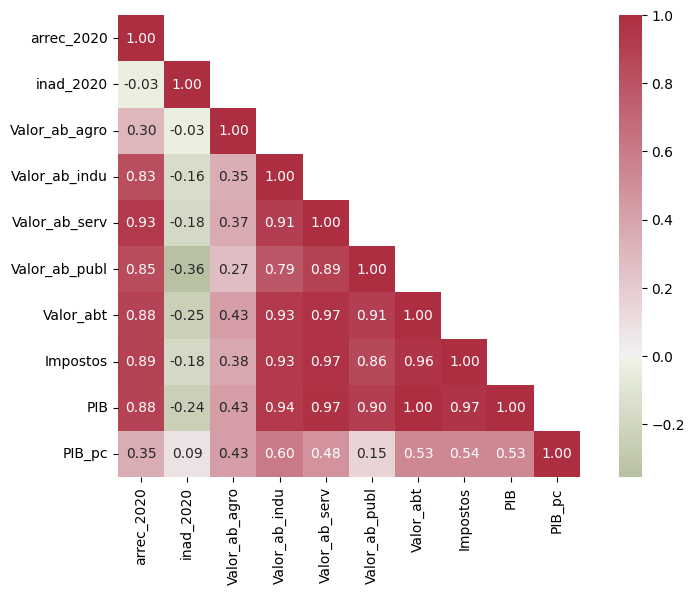

In [39]:
# Filtro das colunas float64
col_flt = list(base_process_log10.dtypes[base_process_log10.dtypes == 'float64'].index)

# Criando máscara
mascara = np.triu(np.ones_like(base_process_log10[col_flt].corr(), dtype=bool))
np.fill_diagonal(mascara, False)

# Parâmetros para criação do palette
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)

# Tamanho do mapa de calor e criação do mesmo
plt.figure(figsize=(10, 6))
sns.heatmap(base_process_log10[col_flt].corr(), mask=mascara, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

# Apresenta o het map só com o triângulo inferior da matriz definida pela mascara e palette
plt.show()

In [40]:
# nova coluna indice para preparação da tabela pivot e cria tabela pivot
correlacao ['ind_pivot'] = correlacao.index
corr_pivot = correlacao.melt(id_vars='ind_pivot').copy()

# Filtro para correlaçãoes maiores que 0.93
aux_corr_pivot = corr_pivot[abs(corr_pivot['value']>0.93)].sort_values('ind_pivot')
print('*' * 62)
print('Correlação entre variáveis preditoras acima de 0,93 (absoluto)')
print('*' * 62)
print(aux_corr_pivot[aux_corr_pivot['ind_pivot'] != aux_corr_pivot['variable']])

**************************************************************
Correlação entre variáveis preditoras acima de 0,93 (absoluto)
**************************************************************
         ind_pivot       variable  value
303       Impostos            PIB   0.97
229       Impostos      Valor_abt   0.96
155       Impostos  Valor_ab_serv   0.97
118       Impostos  Valor_ab_indu   0.93
119            PIB  Valor_ab_indu   0.94
156            PIB  Valor_ab_serv   0.97
267            PIB       Impostos   0.97
230            PIB      Valor_abt   1.00
262  Valor_ab_indu       Impostos   0.93
225  Valor_ab_indu      Valor_abt   0.93
299  Valor_ab_indu            PIB   0.94
4    Valor_ab_serv     arrec_2020   0.93
226  Valor_ab_serv      Valor_abt   0.97
300  Valor_ab_serv            PIB   0.97
263  Valor_ab_serv       Impostos   0.97
117      Valor_abt  Valor_ab_indu   0.93
302      Valor_abt            PIB   1.00
154      Valor_abt  Valor_ab_serv   0.97
265      Valor_abt       Imposto

## 4.3) Eliminação de atributos:

*   Baixa Colinearidade com o Label

                        Est_GO



*   Alta Colinearidade entre atributos (Exceto Label)

                       Valor_ab_indu

                       Valor_ab_serv

                       Valor_abt

                       Impostos





In [41]:
base_process_log10.drop(columns=['Est_GO','Valor_ab_indu', 'Valor_ab_serv', 'Valor_abt','Impostos'], inplace=True)
print('*' * 281)
print('Base Final para aplicação dos Modelos de Machine Learning')
print('-' * 75)
print(base_process_log10)
print('*' * 281)

*****************************************************************************************************************************************************************************************************************************************************************************************
Base Final para aplicação dos Modelos de Machine Learning
---------------------------------------------------------------------------
      arrec_2020  inad_2020  Valor_ab_agro  Valor_ab_publ  PIB  PIB_pc  Est_AC  Est_AL  Est_AM  Est_AP  Est_BA  Est_CE  Est_DF  Est_ES  Est_MA  Est_MG  Est_MS  Est_MT  Est_PA  Est_PB  Est_PE  Est_PI  Est_PR  Est_RJ  Est_RN  Est_RO  Est_RR  Est_RS  Est_SC  Est_SE  Est_SP  Est_TO
0           4.80       0.37           7.88           8.03 8.48    4.29       1       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0       0
1           4.63       0.4

## 4.4) Gravação da base final em formato Excel

In [42]:
base_process_log10.to_excel('base_final_ml.xlsx')
files.download('base_final_ml.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>